In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Read Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [ ]:
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
df=pd.read_csv('/content/sample_data/zomato.csv')

ParserError: Error tokenizing data. C error: EOF inside string starting at row 5745

In [ ]:
df.head()

NameError: name 'df' is not defined

# **Data Describtion**:

| Attribute | Description |
|----------|----------|
|url	|Url of restaurant
|address	|Address of restaurant
|name	|Name's restaurant
|online_order |The customer can book an order online or not
|book_table	|The customer can book a table or not
|rate	|Rate's restaurant
|votes  |votes of restaurant
|phone	|phone of restaurant
|location	|location of restaurant
|rest_type	|The type of service provided by the restaurant
|dish_liked	|The type of dish provided by the restaurant
|cuisines	|The type of cuisines provided by the restaurant
|approx_cost(for two people)		|approx cost for two people
|reviews_list	|the list has content reviews of the restaurant
|menu_item	|the list has content menu of the restaurant
|listed_in(type)		|The type of service provided by the restaurant
|reviews_list	|list contents reviews of restaurant
|listed_in(city)	|city of restaurant


# **Objective of this project:**
__prediction if restaurtant will be success and make gains or not__

# **Understanding and clean data**

### i will do in this process:

1) [Understanding data](#section1)<br>

2) [Feature engineering](#section2)<br>

3) [check missing values](#section3)<br>

4) [check dupilcated](#section4)<br>

<a id=section1></a>
**1) Understanding data**


In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape #shape of data

(51717, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.address.unique()

array(['942, 21st Main Road, 2nd Stage, Banashankari, Bangalore',
       '2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore',
       '1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore',
       ...,
       'Cessna Business Park, Sarjapur Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x96 Marathahalli Outer Ring Road, Kadubeesanahalli, Bellandur Post, Bengaluru, Karnataka',
       '44, Kodigehalli to Hoodi Main Road, Mahadevapura Post, KR Puram, Bangalore',
       '139/C1, Next To GR Tech Park, Pattandur Agrahara, ITPL, Main Road, Whitefield, Bangalore'],
      dtype=object)

In [ ]:
len(df.address.unique())

11495

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
categorical=df.select_dtypes(include="object").columns.drop(["url","address"])
categorical

Index(['name', 'online_order', 'book_table', 'rate', 'phone', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
for cat in categorical:
    print(df[cat].value_counts())
    print("*******************")

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8792, dtype: int64
*******************
online_order
Yes    30444
No     21273
Name: count, dtype: int64
*******************
book_table
No     45268
Yes     6449
Name: count, dtype: int64
*******************
rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
     

__Note:__

1) How there many restautant have same phone?

2) there are related between reviews_list and rate column ,because first word in reviews_list is rated, so that i can imput missing value with this related

3) in features engineer i will do in menu_item i will convert any [] to "not have menu" else convet to "have menu"


In [ ]:
#1) How there many restautant have same phone?
df["phone"].value_counts()

phone
080 43334321                          216
080 43334333                          167
+91 7005889963                         78
+91 8197170008                         75
+91 7710055553                         58
                                     ... 
+91 9845687999\r\r\n080 41494199        1
+91 9606443393\r\r\n+91 9606443394      1
+91 9538798222                          1
080 48902064\r\r\n+91 9620723546        1
+91 8884297989\r\r\n+91 9886759367      1
Name: count, Length: 14926, dtype: int64

In [ ]:
df[df["phone"]=="080 43334321"]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
927,https://www.zomato.com/bangalore/easy-bites-jp...,"1260 SY 35/4 SJR Tower's, 24th Main Puttanhall...",Easy Bites,Yes,No,4.1/5,63,080 43334321,JP Nagar,"Takeaway, Delivery","Sandwich, Crispy Chicken, French Fries","Fast Food, Sandwich",300,"[('Rated 1.0', ""RATED\n I ordered three tawa ...","['Fitshack', 'Snack Pop Box', 'Popullicious Co...",Delivery,Bannerghatta Road
929,https://www.zomato.com/bangalore/dabba-gosht-j...,"1260 SY 35/4 SJR Tower's, 24th Main Puttanhall...",Dabba Gosht,Yes,No,3.4/5,9,080 43334321,JP Nagar,"Takeaway, Delivery",NaN,"Arabian, Middle Eastern",400,"[('Rated 1.0', ""RATED\n Don't eat the food. I...","['Dabba Ghosht Box1', 'Dabba Ghosht Box2', 'Da...",Delivery,Bannerghatta Road
930,https://www.zomato.com/bangalore/empire-restau...,"1260, SY 35/4, SJR Towers, 24th Main Puttanhal...",Empire Restaurant,Yes,No,3.6/5,113,080 43334321,JP Nagar,"Takeaway, Delivery",NaN,"Kerala, Seafood, South Indian, Chinese, North ...",400,"[('Rated 2.0', ""RATED\n Got Matar paneer inst...","['Empire Box 3', 'Empire Box 4', 'Empire Box 8...",Delivery,Bannerghatta Road
931,https://www.zomato.com/bangalore/punjabites-jp...,"1260 SY 35/4 SJR Tower's, JP Nagar 7th Phase, ...",Punjabites,Yes,No,3.7/5,5,080 43334321,JP Nagar,"Takeaway, Delivery",NaN,"North Indian, Charcoal Chicken",400,"[('Rated 1.0', 'RATED\n I ordered Murgh chick...","['Punjabi Veg Box', 'Palak Paneer Box', 'Pindi...",Delivery,Bannerghatta Road
936,https://www.zomato.com/bangalore/al-bek-jp-nag...,"1260, SY 35/4, SJR Towers, 24th Main Puttanhal...",Al-Bek,Yes,No,3.6/5,208,080 43334321,JP Nagar,"Takeaway, Delivery","Chicken Grill, Biryani","Biryani, North Indian, Charcoal Chicken, Chine...",300,"[('Rated 4.0', ""RATED\n Ordered Biryani from ...","['Veg Schezwan Noodles', 'Egg Schezwan Fried R...",Delivery,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50154,https://www.zomato.com/bangalore/a2b-adyar-ana...,"710, Thubarahalli, Varthur Main Road, Whitefie...",A2B - Adyar Ananda Bhavan,Yes,No,3.8 /5,39,080 43334321,"Varthur Main Road, Whitefield","Takeaway, Delivery",NaN,"South Indian, North Indian, Chinese, Street Food",200,"[('Rated 4.0', 'RATED\n This is based on 3 or...",[],Delivery,Whitefield
50182,https://www.zomato.com/bangalore/cakezone-vart...,"710, Thubarahalli, Varthur Main Road, Whitefie...",CakeZone,Yes,No,3.9 /5,33,080 43334321,"Varthur Main Road, Whitefield","Takeaway, Delivery",NaN,"Bakery, Desserts",200,"[('Rated 5.0', ""RATED\n They have very nice v...","['Chocolate Truffle Cake (500 Grams)', 'Black ...",Delivery,Whitefield
50190,https://www.zomato.com/bangalore/shaadi-ki-bir...,"Shop 710, Thubarahalli, Varthur Main Road, Whi...",Shaadi Ki Biryani,Yes,No,2.5 /5,24,080 43334321,"Varthur Main Road, Whitefield","Takeaway, Delivery",NaN,"Biryani, Charcoal Chicken",600,"[('Rated 5.0', 'RATED\n I happened to visit t...",[],Delivery,Whitefield
50233,https://www.zomato.com/bangalore/fujian-expres...,"710, Thubarahalli Varthur Main Road, Whitefiel...",Fujian Express,Yes,No,3.7 /5,38,080 43334321,"Varthur Main Road, Whitefield","Takeaway, Delivery",NaN,"Chinese, Thai",200,"[('Rated 4.0', 'RATED\n Had ordered veg fried...","['Crispy Chilly Baby Corn', 'Chilli Chicken', ...",Delivery,Whitefield


In [ ]:
df[df["phone"]=="080 43334321"]["url"]

927      https://www.zomato.com/bangalore/easy-bites-jp...
929      https://www.zomato.com/bangalore/dabba-gosht-j...
930      https://www.zomato.com/bangalore/empire-restau...
931      https://www.zomato.com/bangalore/punjabites-jp...
936      https://www.zomato.com/bangalore/al-bek-jp-nag...
                               ...                        
50154    https://www.zomato.com/bangalore/a2b-adyar-ana...
50182    https://www.zomato.com/bangalore/cakezone-vart...
50190    https://www.zomato.com/bangalore/shaadi-ki-bir...
50233    https://www.zomato.com/bangalore/fujian-expres...
50915    https://www.zomato.com/bangalore/hottey-smokey...
Name: url, Length: 216, dtype: object

In [ ]:
df[df["phone"]=="080 43334321"]["url"][927]

'https://www.zomato.com/bangalore/easy-bites-jp-nagar-bangalore?context=eyJzZSI6eyJlIjpbIjE4Njk4NjYzIiwiMTg2MjkzMzkiLCIxODg4NzQxMCIsIjE4ODQ0NDIzIiwxODc5NjgxOCwiMTg1NzY0ODAiLCIxODc5NjgxNiIsIjE4Nzk2NzI1IiwiMTg3OTY3OTMiLCIxODY0MzYxOCIsIjE4NjQ4Mzg1IiwiNTQ1MjEiLCIxODg0ODI5NSIsIjE4Nzk2NzQzIiwiNTc4MjgiLCIxODU1NTE1NCIsIjE4NzcyNzQwIiwiNTY0ODgiLCIxODE3MzA3OCIsIjE4NTU2MjQ4IiwiMTg0NTc2MDQiLCIxODc5NjgzNCIsIjE4NjMxODAyIiwiNTY5MTMiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJhbm5lcmdoYXR0YSBSb2FkIn19'

In [ ]:
df[df["phone"]=="080 43334321"]["url"][929]

'https://www.zomato.com/bangalore/dabba-gosht-jp-nagar-bangalore?context=eyJzZSI6eyJlIjpbIjE4ODg3NDEwIiwiMTg4NDQ0MjMiLCIxODc5NjgxOCIsIjE4NTc2NDgwIiwxODc5NjgxNiwiMTg3OTY3MjUiLCIxODc5Njc5MyIsIjE4NjQzNjE4IiwiMTg2NDgzODUiLCI1NDUyMSIsIjE4ODQ4Mjk1IiwiMTg3OTY3NDMiLCI1NzgyOCIsIjE4NTU1MTU0IiwiMTg3NzI3NDAiLCI1NjQ4OCIsIjE4MTczMDc4IiwiMTg1NTYyNDgiLCIxODQ1NzYwNCIsIjE4Nzk2ODM0IiwiMTg2MzE4MDIiLCI1NjkxMyJdLCJ0IjoiRGVsaXZlcnkgUmVzdGF1cmFudHMgaW4gQmFubmVyZ2hhdHRhIFJvYWQifX0='

There's something wrong when collecting data because number of last two restaurtant are different, but no problem i will convert all restaurtant that  have number to "have phone",and convert all restaurtant that not have number to "not have phone" in feature engineer.

-----------------------

<a id=section2></a>
**2) Feature engineering**

In [ ]:
# i will do in menu_item i will convert any [] to "not have menu" else convet to "have menu"

def convert(x):
    if x=="[]":
        return "not have menu"
    else:
        return "have menu"

In [ ]:
df.menu_item=df.menu_item.apply(convert)

In [ ]:
df.sample(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
40692,https://www.zomato.com/bangalore/homms-maratha...,"2A & 3, 15th Cross Rd, Below Zolo Stays Utopia...",HOMMS,Yes,No,4.5 /5,236,080 49652890,Marathahalli,Quick Bites,"Tandoori Momos, Pasta, Afghani Momos, Chicken ...","Momos, Chinese, Fast Food",300,"[('Rated 5.0', ""RATED\n Seeing an affordable,...",not have menu,Delivery,Marathahalli
33459,https://www.zomato.com/bangalore/kaaka-t-cafe-...,"Ground Floor, Sona Towers, Next to Christ Coll...",Kaaka T Cafe,No,No,3.5 /5,6,+91 7996446475,BTM,Quick Bites,NaN,Fast Food,400,"[('Rated 5.0', 'RATED\n Really good place to ...",not have menu,Delivery,Koramangala 6th Block
14860,https://www.zomato.com/bangalore/mummy-dhaba-u...,"Next To Lavanya Theater, St.John's Road, Ulsoo...",Mummy Dhaba,Yes,No,3.2/5,46,+91 8951133536,Ulsoor,Quick Bites,Dal Makhani,North Indian,300,"[('Rated 1.0', ""RATED\n I've ordered dal rajm...",not have menu,Delivery,Frazer Town
1374,https://www.zomato.com/bangalore/biryani-night...,"202, 1st Main, 8th Cross, Lakshmi Layout, BTM ...",Biryani Nights,Yes,No,3.6/5,19,+91 8310973635,Bannerghatta Road,Quick Bites,NaN,"South Indian, North Indian, Chinese",400,"[('Rated 5.0', 'RATED\n The food was amazing?...",have menu,Delivery,Bannerghatta Road
29072,https://www.zomato.com/bangalore/vegigate-sarj...,"Opposite IOC Petrol Pump, Main Road, Sarjapur ...",VegiGate,No,No,NaN,0,+91 7829222998,Sarjapur Road,"Cafe, Quick Bites",NaN,"Cafe, Chinese",500,[],not have menu,Dine-out,Koramangala 4th Block
18741,https://www.zomato.com/bangalore/bangalore-man...,"196, 3rd Floor, Double Road, Indiranagar, Bang...",Bangalore Mandarin,Yes,No,4.2/5,970,080 41161732\r\n080 25251772,Indiranagar,Casual Dining,"Lime Soda, Crispy Chicken, Kung Pao Chicken, H...","Chinese, Seafood","1,100","[('Rated 3.0', 'RATED\n A small chinese place...",not have menu,Dine-out,Indiranagar
23510,https://www.zomato.com/bangalore/sgs-non-veg-g...,"4, MICO Layout, 2nd Stage, Arekere, Bannerghat...",SGS Non Veg - Gundu Pulav,Yes,No,3.9/5,121,+91 9845511004,Bannerghatta Road,Quick Bites,NaN,"Biryani, South Indian",300,"[('Rated 3.0', ""RATED\n I honestly didn't lik...",not have menu,Dine-out,JP Nagar
7447,https://www.zomato.com/bangalore/indulge-by-in...,"First Floor, Building 836, Rajpalya, Mahadevpu...",INDULGE by InnerChef,Yes,No,3.6/5,32,+91 7975788662\r\n+91 9945737438,Whitefield,Bakery,NaN,"Desserts, Bakery",400,"[('Rated 2.0', 'RATED\n As the menu suggests,...",have menu,Delivery,Brookefield
16473,https://www.zomato.com/bangalore/readybowl-btm...,"1, 1st G Cross, 19th Main, Near Kumariamma Tem...",ReadyBowl,Yes,No,3.7/5,69,+91 9483443443\r\n+91 7829255526,BTM,Delivery,"Rice, Chicken Boneless Biryani, Masala Paneer","Andhra, South Indian, North Indian, Biryani",400,"[('Rated 4.0', 'RATED\n I really like the foo...",not have menu,Delivery,HSR
33169,https://www.zomato.com/bangalore/gourmet-food-...,"Food Street, 18th Cross Road, HSR, Bangalore",Gourmet Food Truck,Yes,No,3.8 /5,18,+91 9513481481\r\n+91 9096102038,South Bangalore,Food Truck,NaN,Chinese,200,"[('Rated 5.0', 'RATED\n Wonderful truck loade...",not have menu,Delivery,Koramangala 6th Block


In [ ]:
# i will convert all restaurtant that have number to "have phone",and convert all restaurtant that not have number to "not have phone"
df.phone.unique()

array(['080 42297555\r\n+91 9743772233', '080 41714161', '+91 9663487993',
       ..., '+91 9663517066\n+91 9686861135', '+91 9164562939',
       '080 65951222'], dtype=object)

In [ ]:
df.phone.isna().sum()

1208

In [ ]:
df[df.phone.isna()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
121,https://www.zomato.com/bangalore/new-mangalore...,"89, Near PES College, 22nd Main Road, Girinaga...",New Mangalore Lunch Home,No,No,3.3/5,7,NaN,Banashankari,Quick Bites,NaN,"Mangalorean, South Indian, North Indian",200,[],not have menu,Delivery,Banashankari
234,https://www.zomato.com/bangalore/kadamba-class...,"Satellite Bus Stand, KSRTC, Mysore Road, Banga...",Kadamba Classic,No,No,3.6/5,16,NaN,Mysore Road,Quick Bites,NaN,South Indian,300,"[('Rated 3.0', 'RATED\n Was on travel mode an...",not have menu,Delivery,Banashankari
300,https://www.zomato.com/bangalore/just-thindi-b...,"27, Gandhi Bazaar Main Rd, Basavanagudi, Banga...",Just Thindi,Yes,No,3.6/5,16,NaN,Basavanagudi,Quick Bites,NaN,South Indian,200,"[('Rated 4.0', 'RATED\n rice bath was good bu...",have menu,Delivery,Banashankari
378,https://www.zomato.com/bangalore/dakshin-kitch...,"Kabirmutt Road, Gavipuram Extension, Basavanag...",Dakshin Kitchen,Yes,No,3.6/5,15,NaN,Basavanagudi,Quick Bites,NaN,South Indian,100,"[('Rated 5.0', ""RATED\n What's special here y...",not have menu,Delivery,Banashankari
466,https://www.zomato.com/bangalore/chettys-corne...,"126/3, Uttarahalli Main Road, Sarvabouma Nagar...",Chetty's Corner,Yes,No,3.4/5,30,NaN,Uttarahalli,Quick Bites,NaN,"Fast Food, Burger, Pizza",200,"[('Rated 3.0', 'RATED\n Hi All,\n\nWe ordered...",not have menu,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51353,https://www.zomato.com/bangalore/chatpata-indi...,"Food Court, Ascendas Park Square Mall, ITPL Ma...",Chatpata India,Yes,No,3.9 /5,103,NaN,Whitefield,Food Court,"Chaat, Raj Kachori",North Indian,400,"[('Rated 3.0', ""RATED\n My experiences in Ban...",have menu,Dine-out,Whitefield
51501,https://www.zomato.com/bangalore/toastys-white...,"3rd Floor, Virginia Mall, Varthur Main Road, W...",Toasty's,No,No,NaN,0,NaN,Whitefield,Food Court,NaN,Fast Food,500,[],not have menu,Dine-out,Whitefield
51591,https://www.zomato.com/bangalore/donne-biryani...,"26, Aparaajita Building, Borewell Road, Opposi...",Donne Biryani Mane,Yes,No,3.5 /5,51,NaN,Whitefield,Quick Bites,NaN,Biryani,300,"[('Rated 4.0', ""RATED\n Donne biriyani mane h...",have menu,Dine-out,Whitefield
51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2 /5,4,NaN,Brookefield,Quick Bites,NaN,"Andhra, Chinese, South Indian",NaN,"[('Rated 2.0', ""RATED\n Food is not upto the ...",not have menu,Dine-out,Whitefield


In [ ]:
df[df.phone.isna()]["phone"]

121      NaN
234      NaN
300      NaN
378      NaN
466      NaN
        ... 
51353    NaN
51501    NaN
51591    NaN
51641    NaN
51714    NaN
Name: phone, Length: 1208, dtype: object

In [ ]:
df_test=df.copy()

In [ ]:
df_test.phone=df_test.phone.fillna("not have phone")
def phone(x):
    if x=='not have phone':
        return x
    else:
        return "have phone"

df_test.phone=df_test.phone.apply(phone)


In [ ]:
df[df.phone.isna()]["phone"]

121      NaN
234      NaN
300      NaN
378      NaN
466      NaN
        ... 
51353    NaN
51501    NaN
51591    NaN
51641    NaN
51714    NaN
Name: phone, Length: 1208, dtype: object

In [ ]:
df_test.phone[121] #check fillna

'not have phone'

In [ ]:
df_test.phone

0            have phone
1            have phone
2            have phone
3            have phone
4            have phone
              ...      
51712        have phone
51713        have phone
51714    not have phone
51715        have phone
51716        have phone
Name: phone, Length: 51717, dtype: object

In [ ]:
df_test.sample(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
34944,https://www.zomato.com/bangalore/a2b-adyar-ana...,"01, 100 Feet Ring Road, 1st Phase, 2nd Stage, ...",A2B - Adyar Ananda Bhavan,Yes,No,4.2 /5,40,have phone,BTM,"Takeaway, Delivery",NaN,"South Indian, North Indian, Street Food",200,"[('Rated 3.0', ""RATED\n I'm a fan of their mi...",have menu,Delivery,Koramangala 7th Block
24865,https://www.zomato.com/bangalore/have-more-kam...,"306, Ground Floor, HRBR Layout, Hennur Main Ro...",Have More,No,Yes,3.9/5,198,have phone,Kammanahalli,Casual Dining,"Lassi, Punjabi Chicken, Tandoori Chicken, Para...",North Indian,700,"[('Rated 4.0', 'RATED\n Have been to this pla...",not have menu,Dine-out,Kalyan Nagar
49344,https://www.zomato.com/bangalore/grandmas-reci...,"12, Anjaneya Swamy, Nilaya, 2nd Cross, Someswa...",Grandma's Recipe,No,No,3.9 /5,51,have phone,Sarjapur Road,"Takeaway, Delivery","Chicken Biryani, Fish Curry","Biryani, Kebab, Kerala",400,"[('Rated 1.0', 'RATED\n This place and addres...",not have menu,Delivery,Sarjapur Road
2772,https://www.zomato.com/bangalore/havmor-basava...,"75, Kanakapura Road, Vasavi Circle, V.V Puram,...",Havmor,Yes,No,3.8/5,21,have phone,Basavanagudi,Dessert Parlor,NaN,"Ice Cream, Desserts",200,"[('Rated 5.0', ""RATED\n Well I ordered chocol...",not have menu,Delivery,Basavanagudi
4713,https://www.zomato.com/bangalore/the-kebab-hou...,"74/2, Outer Ring Road, Bellandur Junction, Bel...",The Kebab House,Yes,No,4.3/5,49,have phone,Bellandur,Quick Bites,"Cheese Naan, Biryani, Onion Rings","Kebab, Biryani",250,"[('Rated 5.0', 'RATED\n There are many places...",not have menu,Dine-out,Bellandur
27679,https://www.zomato.com/bangalore/fruit-juice-b...,"Koramangala 6th Block, Bangalore",Fruit Juice Bar,No,No,NaN,0,have phone,Koramangala 6th Block,Delivery,NaN,"Beverages, Salad",300,[],not have menu,Delivery,Koramangala 4th Block
41609,https://www.zomato.com/bangalore/chai-mania-ma...,"Outer Ring Road, Anand Nagar, Aswath Nagar, Ma...",Chai Mania,Yes,No,2.8 /5,67,have phone,Marathahalli,Cafe,"Ginger Tea, Poha, Paratha, Chai, Chaai","Cafe, Tea, Beverages",300,"[('Rated 1.0', 'RATED\n Ordered poha and aloo...",not have menu,Dine-out,Marathahalli
14214,https://www.zomato.com/bangalore/dilli-6-elect...,"Bettadasanpura Main Road, Behind Ajmera Infini...",Dilli 6,No,No,3.2/5,26,have phone,Electronic City,Casual Dining,NaN,"North Indian, Chinese",450,"[('Rated 5.0', 'RATED\n zabardast ?'), ('Rate...",not have menu,Dine-out,Electronic City
24527,https://www.zomato.com/bangalore/urban-bakes-c...,"415, 5th Main Road, OMBR Layout, Banaswadi, Ba...",Urban Bakes & Cafe,No,No,3.7/5,33,have phone,Banaswadi,Cafe,NaN,"Cafe, Bakery",500,"[('Rated 4.0', ""RATED\n My friend called me f...",not have menu,Delivery,Kalyan Nagar
6154,https://www.zomato.com/bangalore/riwaz-the-rit...,"The Ritz-Carlton, 99, Residency Road, Bangalore",Riwaz - The Ritz-Carlton,No,Yes,4.1/5,270,have phone,Residency Road,"Fine Dining, Bar","Tandoori Broccoli, Dal Makhani, Tamatar Ka Sho...",North Indian,"4,000","[('Rated 4.0', 'RATED\n Great food; ambience ...",not have menu,Dine-out,Brigade Road


In [ ]:
df=df_test.copy()

In [ ]:
df.sample(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
22405,https://www.zomato.com/bangalore/chaitanya-caf...,"135/15, 100 Feet Ring Road, 3rd Phase, JP Naga...",Chaitanya Cafe,Yes,No,3.9/5,92,have phone,JP Nagar,Quick Bites,"Coffee, Pav Bhaji, Masala Dosa, Vada Sambar","South Indian, North Indian, Fast Food",300,"[('Rated 4.0', 'RATED\n Good place to have So...",not have menu,Delivery,JP Nagar
18737,https://www.zomato.com/bangalore/the-ants-cafe...,"2286/B, 1st Cross, 14th A Main, HAL 2nd Stage,...",The Ants Cafe & Store,Yes,Yes,3.9/5,1380,have phone,Indiranagar,Cafe,"English Breakfast, Coffee, Watermelon Feta Sal...","Cafe, Italian",900,"[('Rated 3.0', ""RATED\n Honestly, I've been w...",have menu,Dine-out,Indiranagar
42948,https://www.zomato.com/bangalore/acciarolee-in...,"2268/1, 4th Cross,Cambridge Road, Bangalore",AcciaRolee,No,No,NaN,0,have phone,Indiranagar,Delivery,NaN,Healthy Food,500,[],not have menu,Delivery,MG Road
40459,https://www.zomato.com/bangalore/gillys-restob...,"4th & 5th Floor, Sree Premprasad Complex, Oppo...",Gilly's Restobar,No,Yes,4.5 /5,2713,have phone,New BEL Road,"Pub, Casual Dining","Biryani, Beer, Murgh Platter, Cocktails, Pizza...","Continental, Finger Food, North Indian, Chinese","1,200","[('Rated 4.0', ""RATED\n Another pub on new be...",not have menu,Drinks & nightlife,Malleshwaram
1623,https://www.zomato.com/om-nom-thai-1-food-truc...,"2nd Cross, Munivenkatppa Layout, Bilekahalli, ...",Om Nom Thai,No,No,NaN,0,have phone,South Bangalore,Food Truck,NaN,"Thai, Momos",400,[],not have menu,Delivery,Bannerghatta Road
16273,https://www.zomato.com/bangalore/kanua-sarjapu...,"6/2, Near Wipro Headquaters, Kaikondrahalli, S...",Kanua,Yes,Yes,4.4/5,893,have phone,Sarjapur Road,Casual Dining,"Neer Dosa, Murgh Ghee Roast, Sea Food, Crab Fr...","Konkan, Mangalorean, Seafood","1,400","[('Rated 4.0', 'RATED\n I love this place. No...",not have menu,Delivery,HSR
41271,https://www.zomato.com/bangalore/deckers-lane-...,"Kundanahalli Gate, Sai Baba Temple Road, Next ...",Decker's Lane,Yes,No,2.1 /5,243,have phone,Marathahalli,Quick Bites,"Rolls, Rasgulla, Fish Fry, Bhetki Paturi, Mutt...",Bengali,400,"[('Rated 2.0', 'RATED\n Initially I was prett...",not have menu,Delivery,Marathahalli
3016,https://www.zomato.com/bangalore/dakshin-kitch...,"Kabirmutt Road, Gavipuram Extension, Basavanag...",Dakshin Kitchen,Yes,No,3.6/5,15,not have phone,Basavanagudi,Quick Bites,NaN,South Indian,100,"[('Rated 5.0', ""RATED\n What's special here y...",not have menu,Delivery,Basavanagudi
49835,https://www.zomato.com/bangalore/tipsy-bull-th...,"24-26, 414/80/2, Varthur Hobli, Outer Ring Road",Tipsy Bull - The Bar Exchange,Yes,Yes,4.4 /5,2232,have phone,Bellandur,"Bar, Casual Dining","Falafel, Cocktails, Mocktails, Sea Food, Sprin...","North Indian, Chinese, Continental, Mexican","1,400","[('Rated 4.0', ""RATED\n Definitely one of the...",have menu,Dine-out,Sarjapur Road
45907,https://www.zomato.com/bangalore/nandhini-para...,"210, A Cross, 1st Main, 2nd Stage, Double Road...",Nandhini Paradise,No,Yes,3.7 /5,289,have phone,Indiranagar,Casual Dining,"Thali, Andhra Meal, Chicken Biryani, Roti, And...",North Indian,600,"[('Rated 4.0', 'RATED\n Have been here so man...",not have menu,Dine-out,Old Airport Road


In [ ]:
#split rate and convert data type
df.rate

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [ ]:
df.rate.str.split("/").str[0]

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     NaN
51714     NaN
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [ ]:
df.rate=df.rate.str.split("/").str[0]

In [ ]:
#convert data type
def rate(x):
    try:
        if x=="NEW":
            return 0
        else:
            return float(x)
    except:
        return np.nan
df.rate=df.rate.apply(rate)

In [ ]:
df.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [ ]:
df.rate.dtype

dtype('float64')

In [ ]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
df["approx_cost(for two people)"].str.replace(",","")

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [ ]:
#convert datatype of approx_cost(for two people) to float
df["approx_cost(for two people)"]=pd.to_numeric(df["approx_cost(for two people)"].str.replace(",",""),errors="coerce")

In [ ]:
df["approx_cost(for two people)"]

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [ ]:
df["approx_cost(for two people)"].dtype

dtype('float64')

In [ ]:
#drop some features not important
df.drop(["url","address"],axis=1,inplace=True)

In [ ]:
df.sample(5)

,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
29961,Shift,Yes,Yes,4.2,1920,have phone,HSR,"Lounge, Casual Dining","Paneer Steak, Peri Peri Pizza, Lamb Chops, Chi...","Finger Food, Continental, North Indian",1500.0,"[('Rated 2.0', 'RATED\n Ordered chicken nacho...",have menu,Delivery,Koramangala 5th Block
35236,Shagun Sweets & Foods,Yes,No,3.5,221,have phone,BTM,"Sweet Shop, Quick Bites","Chaat, Chole Bhature, Raj Kachori, Thali, Rasm...","Mithai, North Indian, Street Food, Chinese",400.0,"[('Rated 3.0', 'RATED\n Good place to try out...",not have menu,Delivery,Koramangala 7th Block
26400,Leung Fast Food,No,No,3.5,13,have phone,Banaswadi,Quick Bites,NaN,"Chinese, Fast Food, Seafood, Momos",400.0,"[('Rated 5.0', ""RATED\n Best Chinese food I'v...",not have menu,Dine-out,Kammanahalli
24420,Lassi Shop,No,No,3.5,7,have phone,Banaswadi,Beverage Shop,NaN,"Beverages, Ice Cream",200.0,"[('Rated 5.0', ""RATED\n After Sreeraj lassi b...",not have menu,Delivery,Kalyan Nagar
50194,Kerala Tiffin,Yes,No,3.9,167,have phone,Whitefield,Delivery,Appam,Kerala,300.0,"[('Rated 4.0', 'RATED\n I have ordered Kozhik...",not have menu,Delivery,Whitefield


------------------------

<a id=section3></a>
**3) check missing values**

In [ ]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7844
votes                              0
phone                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
round(df.isna().sum()/df.shape[0],2)*100 #get percentage of missing values

name                            0.0
online_order                    0.0
book_table                      0.0
rate                           15.0
votes                           0.0
phone                           0.0
location                        0.0
rest_type                       0.0
dish_liked                     54.0
cuisines                        0.0
approx_cost(for two people)     1.0
reviews_list                    0.0
menu_item                       0.0
listed_in(type)                 0.0
listed_in(city)                 0.0
dtype: float64

- in[ approx_cost(for two people) ,location , rest_type , cuisines ]will drop rows that have missing values , because percentage of missing values <= 1% of data

- in dish_liked will drop this column , because percentage of missing values >50& of data and i can't estimate missing value

- in rate : there is related between rate and reviews_list

In [ ]:
df.dropna(subset=["approx_cost(for two people)","location","rest_type","cuisines"],inplace=True)#drop missing values rows in approx_cost(for two people)
df.drop("dish_liked",axis=1,inplace=True) #drop column

In [ ]:
#check
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7680
votes                             0
phone                             0
location                          0
rest_type                         0
cuisines                          0
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [ ]:
#missing value in rate and relation with reviews_list

rate_=df[["rate","reviews_list"]]
rate_.sample(20)

,rate,reviews_list
25830,0.0,[]
27373,2.3,"[('Rated 1.0', 'RATED\n So here you go, order..."
22001,4.0,"[('Rated 5.0', 'RATED\n One of the best chai ..."
13626,NaN,[]
2298,3.8,"[('Rated 4.0', 'RATED\n Have been here more t..."
33400,2.8,"[('Rated 1.0', ""RATED\n I ordered a eggless, ..."
25140,3.8,"[('Rated 4.0', 'RATED\n This is my second hom..."
40588,NaN,[]
3978,3.1,"[('Rated 2.0', 'RATED\n I felt like having so..."
46915,3.6,"[('Rated 3.0', 'RATED\n Have passed by this r..."


can i will imput missing value depend on value after Rated in reviews_list , i will imputer in preprocessing process

----------------------------------------

<a id=section4></a>
**4) Check dupilcated**

In [ ]:
df.duplicated().sum()

60

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#check
df.duplicated().sum()

0

------------------------------------

# **EDA**

### i will do in this process:

1) [Univarate](#section5)<br>

2) [Bivarate](#section8)<br>

3) [Multivarate](#section9)<br>


In [ ]:
df_eda=df.copy()

In [ ]:
df_eda.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,have phone,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",not have menu,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,have phone,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",not have menu,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,have phone,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",not have menu,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,have phone,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",not have menu,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,have phone,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",not have menu,Buffet,Banashankari


<a id=section5></a>
# **Univarate**

* [**categorical**](#section6)<br>
* [**Numerical**](#section7)<br>
* [**Conclusion**](#section24)<br>

<a id=section6></a>
### **categorical**

In [ ]:
categorical=df.select_dtypes(include="object").columns.drop(["reviews_list"])
categorical

Index(['name', 'online_order', 'book_table', 'phone', 'location', 'rest_type',
       'cuisines', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
for cat in categorical:
    print(df_eda[cat].value_counts())
    print("*"*50)

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Mast Biryani - Night Express                                1
Kings Court Daba                                            1
New Prakash Hotel                                           1
Taja Coffee                                                 1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8723, dtype: int64
**************************************************
online_order
Yes    30264
No     20824
Name: count, dtype: int64
**************************************************
book_table
No     44649
Yes     6439
Name: count, dtype: int64
*******************************************

__Note:__

__in preprocessing process i will do__

- drop name because its dont mean any thing in business case

- use one_Hot encoder with (online_order , book_table , phone , menu_item)

- use binary encoder with other

In [ ]:
categorical

Index(['name', 'online_order', 'book_table', 'phone', 'location', 'rest_type',
       'cuisines', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

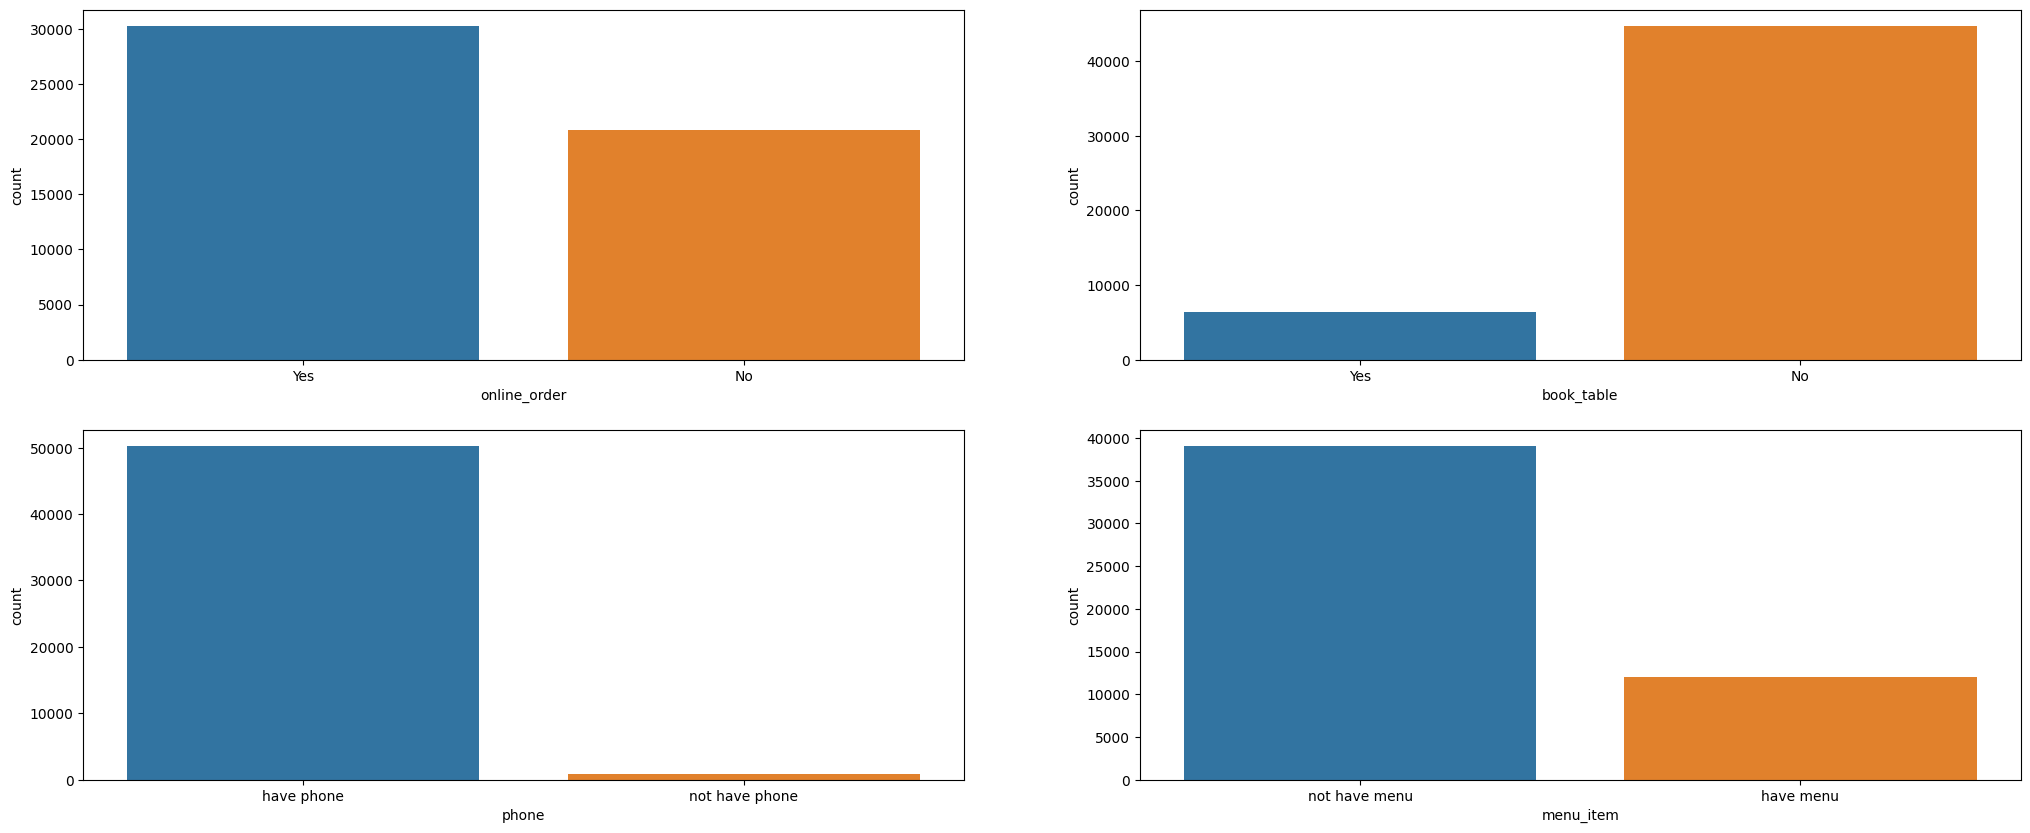

In [ ]:
#subplot has columns that have yes or no
plt.figure(figsize=(25,10))
for i,cat in enumerate(["online_order","book_table","phone","menu_item"],1):
    plt.subplot(2,2,i)
    sns.countplot(x=df_eda[cat])


In [ ]:
df_eda["location"].value_counts().head(10).reset_index()#test

,location,count
0,BTM,5056
1,HSR,2495
2,Koramangala 5th Block,2480
3,JP Nagar,2218
4,Whitefield,2107
5,Indiranagar,2033
6,Jayanagar,1916
7,Marathahalli,1808
8,Bannerghatta Road,1609
9,Bellandur,1268


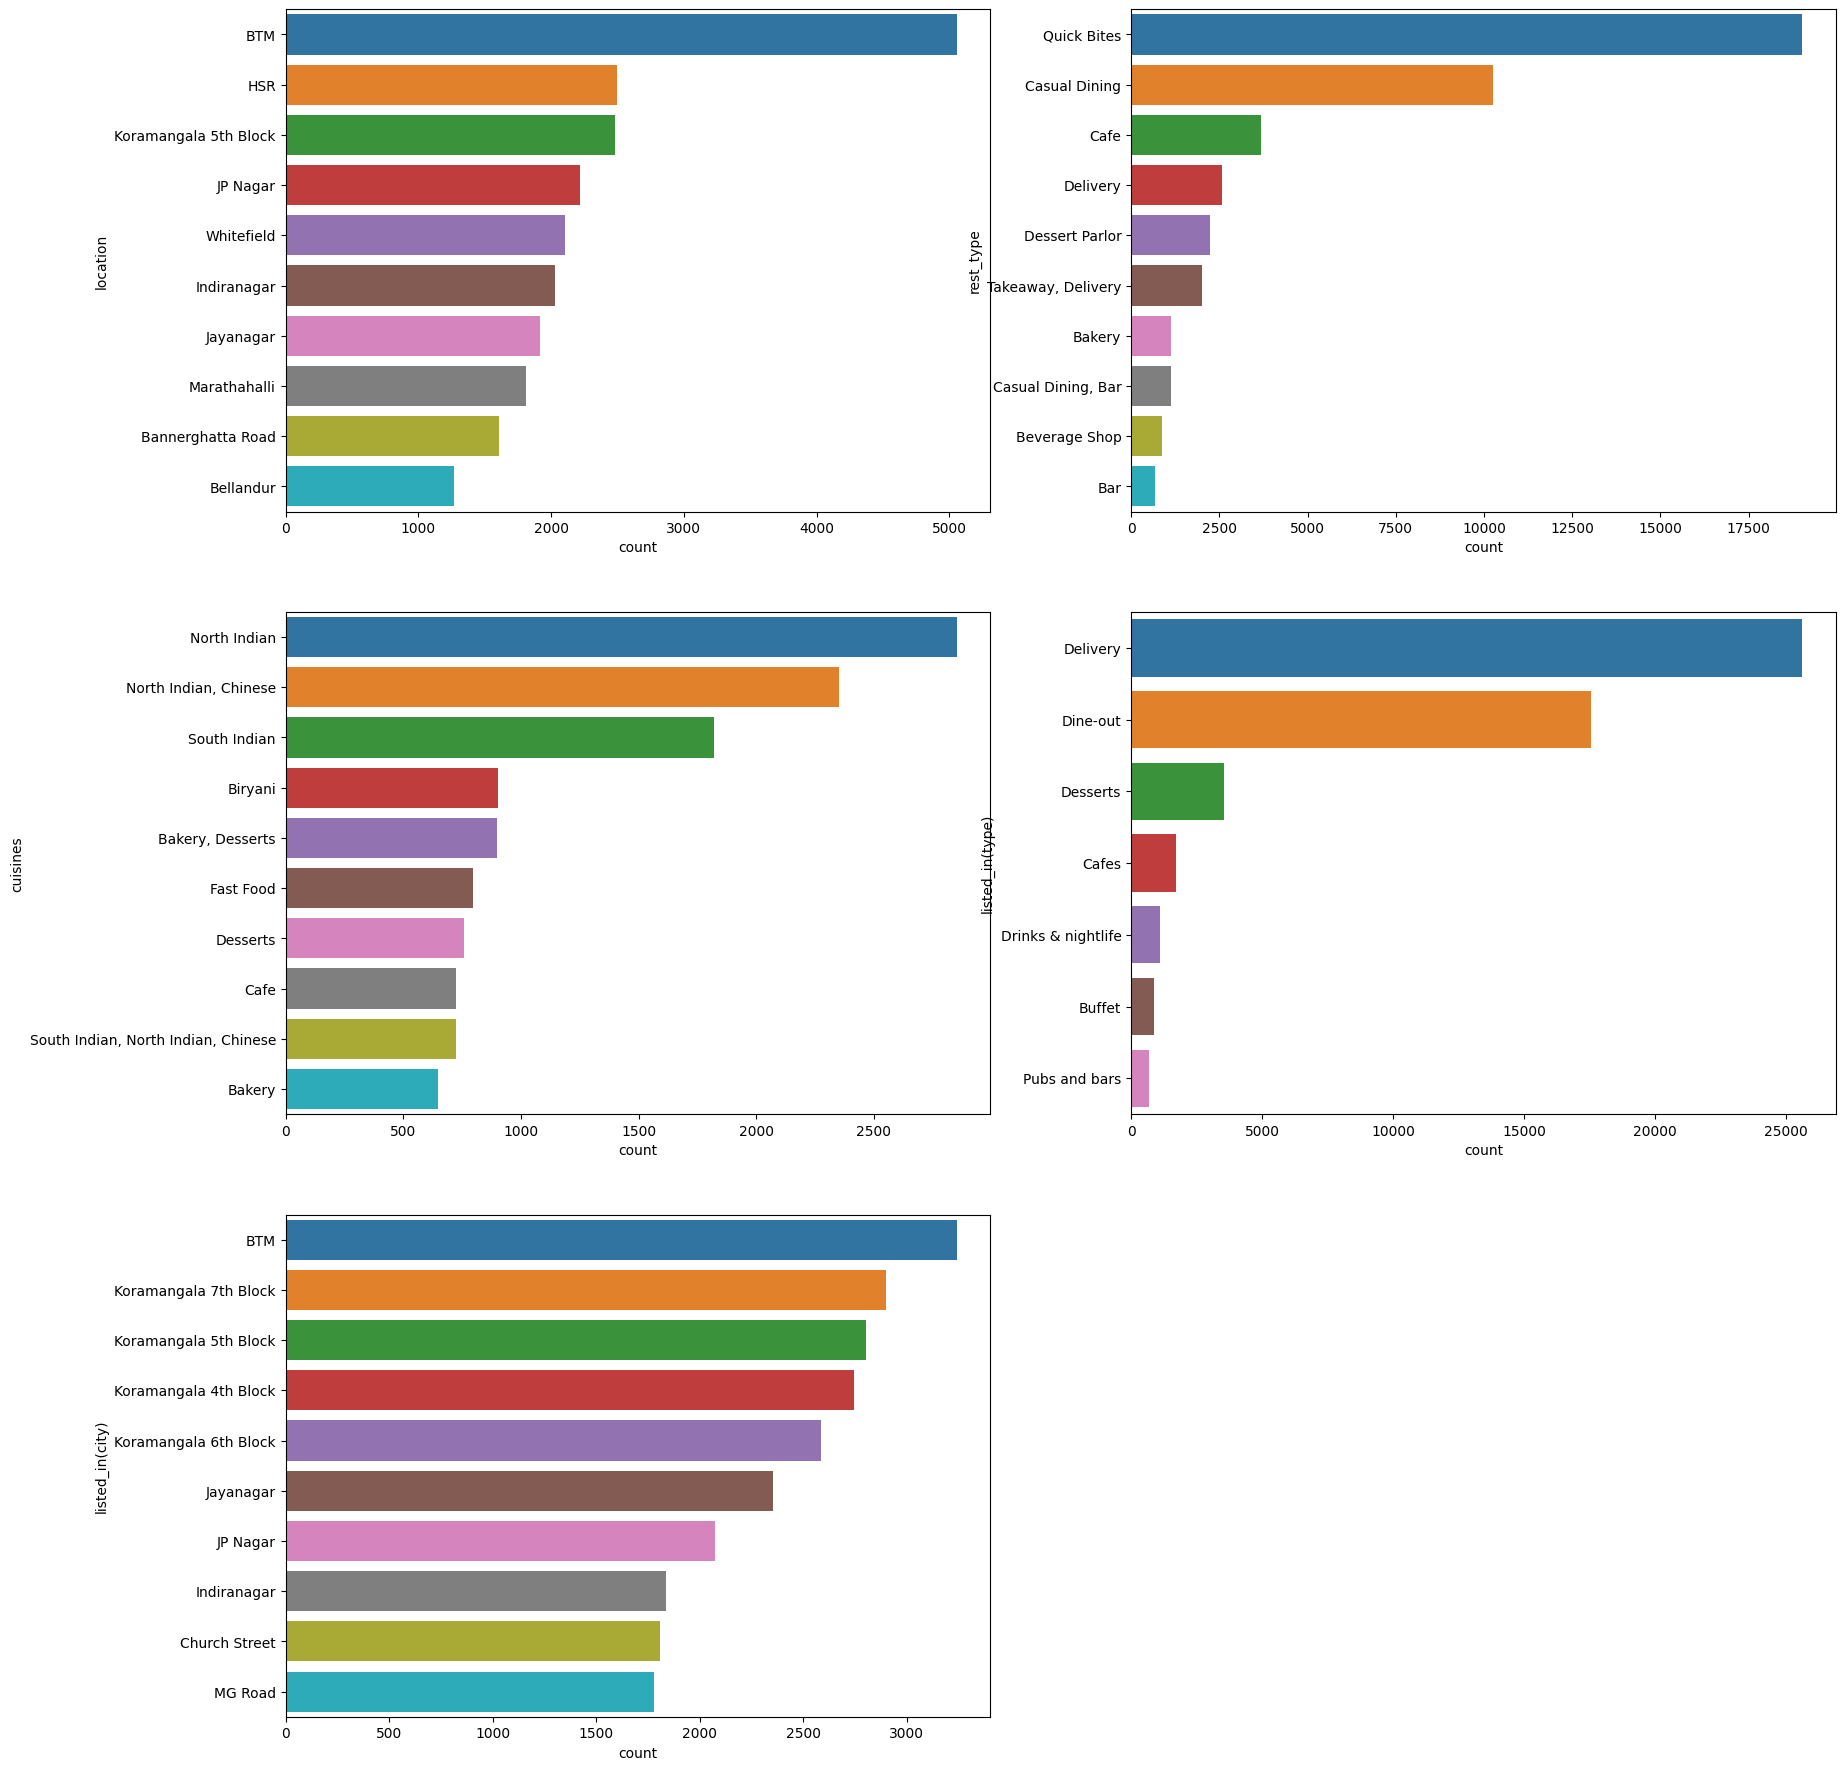

In [ ]:
#subplot of other  categorical columns, but get top 10 only
plt.figure(figsize=(20,30))
for i,cat in enumerate(categorical.drop(["name","online_order","book_table","phone","menu_item"]),1):
    plt.subplot(4,2,i)
    df_=df_eda[cat].value_counts().head(10).reset_index()
    sns.barplot(data=df_,y=cat,x="count")

---------------

<a id=section7></a>
### **Numerical**

In [ ]:
numerical=df.select_dtypes(exclude="object").columns
numerical

Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')

In [ ]:
df_eda[numerical].describe().round(2)

,rate,votes,approx_cost(for two people)
count,43421.00,51088.00,51088.00
mean,3.51,285.14,556.13
std,0.92,806.90,439.65
min,0.00,0.00,40.00
25%,3.30,7.00,300.00
50%,3.70,41.00,400.00
75%,4.00,200.00,700.00
max,4.90,16832.00,6000.00


__Note:__

- In rate there isn't restaurant have rate 5

- somehow there is outliers in votes and approx_cost(for two people)


In this busniess case if restuarant rate > 3.75 will be Successful restaurant (1) , else will be Failed restaurant (0)

In [ ]:
df_eda.rate.isna().sum()

7667

In [ ]:
df_eda[df_eda.rate.isna()]

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
84,Chill Out,No,No,NaN,0,have phone,Banashankari,Quick Bites,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",not have menu,Delivery,Banashankari
90,Me And My Cake,No,No,NaN,0,have phone,Banashankari,Delivery,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",not have menu,Delivery,Banashankari
91,Sunsadm,No,No,NaN,0,have phone,Banashankari,"Takeaway, Delivery",South Indian,400.0,[],not have menu,Delivery,Banashankari
92,Annapooraneshwari Mess,No,No,NaN,0,have phone,Banashankari,Mess,South Indian,200.0,[],not have menu,Delivery,Banashankari
107,Coffee Shopee,No,No,NaN,0,have phone,Banashankari,"Takeaway, Delivery",Beverages,250.0,[],not have menu,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,No,No,NaN,0,have phone,Brookefield,Quick Bites,North Indian,400.0,[],not have menu,Dine-out,Whitefield
51675,Topsy Turvey,No,No,NaN,0,have phone,Whitefield,Bar,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",not have menu,Drinks & nightlife,Whitefield
51710,Topsy Turvey,No,No,NaN,0,have phone,Whitefield,Bar,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",not have menu,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,have phone,Whitefield,Bar,Finger Food,600.0,[],not have menu,Pubs and bars,Whitefield


In [ ]:
def success(x):
        if x >3.75:
            return 1
        elif x  <= 3.75:
            return 0
        else:
            return np.nan

df_eda.rate.apply(success)

0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
51712    0.0
51713    NaN
51714    NaN
51715    1.0
51716    0.0
Name: rate, Length: 51088, dtype: float64

In [ ]:
df_eda.rate=df_eda.rate.apply(success)

In [ ]:
df_eda.rate.value_counts()

rate
0.0    23356
1.0    20065
Name: count, dtype: int64

In [ ]:
# check outilers in votes

df_eda.votes.quantile([0.25,0.50,0.80,0.90,0.95,0.99,0.995,0.999,0.9995,1]).to_frame().T

,0.2500,0.5000,0.8000,0.9000,0.9500,0.9900,0.9950,0.9990,0.9995,1.0000
votes,7.0,41.0,283.0,712.0,1382.65,3849.39,4851.78,9080.0,10548.3695,16832.0


In [ ]:
fig=px.histogram(df_eda.votes)
fig.update_layout(title_text="Histgorm of votes",title_x=0.5)

In [ ]:
fig=px.box(x=df_eda.votes)
fig.update_layout(title_text="Box plot of votes",title_x=0.5)

In [ ]:
df_eda[df_eda.votes>=df_eda.votes.quantile(0.9995)]

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3921,Byg Brewski Brewing Company,Yes,Yes,1.0,16345,have phone,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...",not have menu,Delivery,Bellandur
4801,Byg Brewski Brewing Company,Yes,Yes,1.0,16345,have phone,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...",have menu,Dine-out,Bellandur
4944,Byg Brewski Brewing Company,Yes,Yes,1.0,16345,have phone,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...",have menu,Drinks & nightlife,Bellandur
8330,Truffles,No,No,1.0,14654,have phone,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,"[('Rated 5.0', 'RATED\n Menu is extensive and...",not have menu,Cafes,BTM
9807,Truffles,No,No,1.0,14654,have phone,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,"[('Rated 5.0', 'RATED\n Menu is extensive and...",not have menu,Delivery,BTM
10860,Truffles,No,No,1.0,14654,have phone,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,"[('Rated 5.0', 'RATED\n Menu is extensive and...",not have menu,Dine-out,BTM
18643,Toit,No,No,1.0,14956,have phone,Indiranagar,Microbrewery,"Italian, American, Pizza",1500.0,"[('Rated 4.0', ""RATED\n The crowd keeps flowi...",not have menu,Dine-out,Indiranagar
19268,Toit,No,No,1.0,14956,have phone,Indiranagar,Microbrewery,"Italian, American, Pizza",1500.0,"[('Rated 4.0', ""RATED\n The crowd keeps flowi...",not have menu,Drinks & nightlife,Indiranagar
26549,Truffles,No,No,1.0,14690,have phone,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,"[('Rated 4.0', 'RATED\n Package: 4/5\nFood: 4...",not have menu,Cafes,Koramangala 4th Block
27806,Truffles,No,No,1.0,14694,have phone,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,"[('Rated 4.0', 'RATED\n Package: 4/5\nFood: 4...",not have menu,Delivery,Koramangala 4th Block


There is outliers, in preprocessing i will drop all value that have quantitle > 0.9995 and use Robust scale.

In [ ]:
# check outilers in votes

df_eda["approx_cost(for two people)"].quantile([0.25,0.50,0.80,0.90,0.95,0.99,0.995,0.999,0.9995,1]).to_frame().T

,0.2500,0.5000,0.8000,0.9000,0.9500,0.9900,0.9950,0.9990,0.9995,1.0000
approx_cost(for two people),300.0,400.0,750.0,1100.0,1500.0,2200.0,2800.0,3500.0,4000.0,6000.0


In [ ]:
fig=px.histogram(df_eda["approx_cost(for two people)"])
fig.update_layout(title_text="Histgorm of votes",title_x=0.5)

In [ ]:
fig=px.box(x=df_eda["approx_cost(for two people)"])
fig.update_layout(title_text="Box plot of votes",title_x=0.5)

<a id=section7></a>
yes there is outies , but its normal so i dont drop any value but i also will use Robust scale in preprocessing

<a id=section24></a>

### **Conclusion from Unviarate**

in preprocessing i will do :

- drop name because its dont mean any thing in business case

- use one_Hot encoder with (online_order , book_table , phone , menu_item)

- use binary encoder with other

- drop all value that have quantitle > 0.9995 in votes

- use Robust scale with (votes , approx_cost(for two people))


----------------------


<a id=section8></a>
# **Bivarate**
## In this process i will ask some question and Visualization answer this question:
   * [ **Top 10 restaurant successful (rate=1)** (name,rate)](#section10)<br>
   * [ **Relation between online_order and rate** ](#section11)<br>
   * [ **Relation between book_table and rate** ](#section12)<br>
   * [ **Average votes for rate**](#section13)<br>
   * [ **Relation between phone and rate**](#section14)<br>
   * [ **Top 10 locations that have a successful restaurant and Competition is high(rate=1)**](#section15)<br>
   * [ **Top 10 locations with low competition (rate=0)**](#section16)<br>
   * [ **Relation between list_in(city) and rate**](#section17)<br>
   * [ **Top 10 rest_type has good reputation (rate=1)**](#section18)<br>
   * [ **Top 10 cuisines has good reputation (rate=1)**](#section19)<br>
   * [ **Relation between listed_in(type) and rate**](#section40)<br>
   * [ **Average approx cost for rate**](#section20)<br>
   * [ **Relation between menu_item and rate**](#section21)<br>
   * [ **Correlation**](#section22)<br>
   * [ **Conclusion**](#section23)<br>

In [ ]:
df_eda.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,1.0,775,have phone,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",not have menu,Buffet,Banashankari
1,Spice Elephant,Yes,No,1.0,787,have phone,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",not have menu,Buffet,Banashankari
2,San Churro Cafe,Yes,No,1.0,918,have phone,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",not have menu,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,0.0,88,have phone,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",not have menu,Buffet,Banashankari
4,Grand Village,No,No,1.0,166,have phone,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",not have menu,Buffet,Banashankari


In [ ]:
#convert datatype of rate to object to make easy in Visualization
df_eda.rate=df_eda.rate.astype("O")

In [ ]:
df_eda.rate.dtype

dtype('O')

In [ ]:
# Visualization Function
def bar(data_frame,x,y,title_text,color=None):
    fig=px.bar(data_frame=data_frame,x=x,y=y,color=color, barmode='group',text_auto="0.2s")
    fig.update_traces(textfont_size=12,textposition="outside")
    fig.update_layout(title_text=title_text,title_x=0.5)
    return fig

<a id=section10></a>
### **Top 10 restaurant successful (rate=1)** (name,rate)

In [ ]:
#pandas
data=df_eda[df_eda.rate==1].groupby("name")["rate"].count().reset_index().sort_values(by="rate",ascending=False).head(10)
data

,name,rate
1712,Onesta,85
787,Empire Restaurant,62
1804,Polar Bear,58
1216,Kanti Sweets,57
805,Faasos,55
2123,Smally's Resto Cafe,54
2261,Sweet Truth,53
615,Corner House Ice Cream,52
377,Burger King,46
2762,eat.fit,46


In [ ]:
bar(data,"name","rate","Top 10 restaurant successful (rate=1)")

--------------------------

<a id=section11></a>
### **Relation between online_order and rate**

In [ ]:
#pandas
data=df_eda.groupby(["rate","online_order"]).agg({"online_order":"count"}).rename(columns={"online_order":"count"}).reset_index()
data

,rate,online_order,count
0,0.0,No,9229
1,0.0,Yes,14127
2,1.0,No,6033
3,1.0,Yes,14032


In [ ]:
bar(data,"rate","count",color="online_order",title_text="Relation between online_order and rate")

- To be restaurant sucessful you have to online_order service is available

----------------------------

<a id=section12></a>
### **Relation between book_table and rate**

In [ ]:
#pandas
data=df_eda.groupby(["rate","book_table"]).agg({"book_table":"count"}).rename(columns={"book_table":"count"}).reset_index()
data

,rate,book_table,count
0,0.0,No,22755
1,0.0,Yes,601
2,1.0,No,14243
3,1.0,Yes,5822


In [ ]:
bar(data,"rate","count",color="book_table",title_text="Relation between book_table and rate")

- There is not relation between book_table and rate , that mean you can be restaurant successful without book table service is available

---------------------------

<a id=section13></a>
### **Average votes for rate**

In [ ]:
data=df_eda.groupby("rate")["votes"].mean().reset_index()
data

,rate,votes
0,0.0,58.324114
1,1.0,657.110441


In [ ]:

bar(data,"rate","votes","Average votes for rate")

- Most restaurant successful  have vote

------------

<a id=section14></a>
### **Relation between phone and rate**

In [ ]:
#pandas
data=df_eda.groupby(["rate","phone"]).agg({"phone":"count"}).rename(columns={"phone":"count"}).reset_index()
data

,rate,phone,count
0,0.0,have phone,23004
1,0.0,not have phone,352
2,1.0,have phone,19828
3,1.0,not have phone,237


In [ ]:
bar(data,"rate","count",color="phone",title_text="Relation between phone and rate")

- To open any resturant must be have phone number

--------------------------------

<a id=section15></a>
### **Top 10 locations that have a successful restaurant and Competition is high((rate=1)**

In [ ]:
#pandas
data=df_eda[df_eda.rate==1].groupby("location")["rate"].count().reset_index().sort_values(by="rate",ascending=False).head(10)
data

,location,rate
43,Koramangala 5th Block,1766
0,BTM,1207
26,Indiranagar,1183
21,HSR,975
30,Jayanagar,955
28,JP Nagar,830
45,Koramangala 7th Block,689
82,Whitefield,628
44,Koramangala 6th Block,614
42,Koramangala 4th Block,613


In [ ]:
bar(data,"location","rate",title_text="Top 10 locations that have a successful restaurant and Competition is high((rate=1)")

-  Koramangala 5th Block, BTM and Indiranagar have successful restaurant and Competition is high.

-----------------------------------

<a id=section16></a>
### **Top 10 locations with low competition (rate=0)**

In [ ]:
#pandas
data=df_eda[df_eda.rate==0].groupby("location")["rate"].count().reset_index().sort_values(by="rate",ascending=False).tail(10)
data

,location,rate
83,Uttarahalli,9
11,Central Bangalore,8
38,Kengeri,7
23,Hebbal,6
49,Langford Town,5
87,West Bangalore,5
90,Yelahanka,2
63,Peenya,1
57,Nagarbhavi,1
67,Rajarajeshwari Nagar,1


In [ ]:
bar(data,"location","rate",title_text="Top 10 locations with low competition (rate=0)")

- in Mysore Road and Hebbal, competition is low

- __in my opinion__: you can open resturant in Mysore Road or Hebbal that have lower competition make good reputation after that open in Koramangala 5th Block or BTM that have higher competition.

------------------------------

<a id=section17></a>
### **Relation between list_in(city) and rate**

In [ ]:
#pandas
data=df_eda.groupby(["rate","listed_in(city)"]).agg({"listed_in(city)":"count"}).rename(columns={"listed_in(city)":"count"}).reset_index().sort_values(by="count",ascending=False)
data

,rate,listed_in(city),count
0,0.0,BTM,1496
49,1.0,Koramangala 7th Block,1257
30,1.0,BTM,1251
19,0.0,Koramangala 7th Block,1217
47,1.0,Koramangala 5th Block,1194
46,1.0,Koramangala 4th Block,1194
17,0.0,Koramangala 5th Block,1182
16,0.0,Koramangala 4th Block,1159
48,1.0,Koramangala 6th Block,1135
12,0.0,JP Nagar,1082


In [ ]:
data.rate=data.rate.astype("O")

In [ ]:
bar(data,"listed_in(city)","count",color="rate",title_text="Relation between list_in(city) and rate")

- __Conclusion__:

BTM , Koramangala 7th Block and Koramangala 5th Block, have the highest percentage of restaurant  successful or failed , so competition is very high



--------------------

<a id=section18></a>
### **Top 10 rest_type has good reputation (rate=1)**

In [ ]:
#pandas
data=df_eda[df_eda.rate==1].groupby("rest_type")["rate"].count().reset_index().sort_values(by="rate",ascending=False).head(10)
data

,rest_type,rate
21,Casual Dining,5490
62,Quick Bites,4275
13,Cafe,2225
32,Dessert Parlor,1240
22,"Casual Dining, Bar",893
31,Delivery,586
4,Bar,358
5,"Bar, Casual Dining",326
37,Fine Dining,313
71,"Takeaway, Delivery",310


In [ ]:
bar(data,"rest_type","rate",title_text="Top 10 rest_type has good reputation (rate=1)")

- To be successful restaurant you have to rest type will be Casual Dining or Quick Bites

----------------------------

<a id=section19></a>
### **Top 10 cuisines has good reputation (rate=1)**

In [ ]:
#pandas
data=df_eda[df_eda.rate==1].groupby("cuisines")["rate"].count().reset_index().sort_values(by="rate",ascending=False).head(10)
data

,cuisines,rate
1047,North Indian,816
1379,South Indian,408
1080,"North Indian, Chinese",392
681,Desserts,336
156,"Bakery, Desserts",290
285,Cafe,287
859,"Ice Cream, Desserts",236
687,"Desserts, Beverages",205
1421,"South Indian, North Indian, Chinese",190
1017,"Mithai, Street Food",168


In [ ]:
bar(data,"cuisines","rate",title_text="Top 10 cuisines has good reputation (rate=1)")

- To be successful restaurant you have to cuisines type will be North Indian or Chinese or South Indian

---------------------------

<a id=section20></a>
### **Average approx cost for rate**

In [ ]:
data=df_eda.groupby("rate")["approx_cost(for two people)"].mean().reset_index()
data

,rate,approx_cost(for two people)
0,0.0,442.067392
1,1.0,773.866434


In [ ]:
bar(data,"rate","approx_cost(for two people)","Average approx cost for rate")

------------------------

<a id=section40></a>
### **Relation between listed_in(type) and rate**

In [ ]:
#pandas
data=df_eda.groupby(["rate","listed_in(type)"]).agg({"listed_in(type)":"count"}).rename(columns={"listed_in(type)":"count"}).reset_index().sort_values(by="count",ascending=False
                                                                                                                                                      )
data


,rate,listed_in(type),count
2,0.0,Delivery,12601
9,1.0,Delivery,8981
4,0.0,Dine-out,8229
11,1.0,Dine-out,6577
10,1.0,Desserts,1490
3,0.0,Desserts,1356
8,1.0,Cafes,1010
12,1.0,Drinks & nightlife,829
7,1.0,Buffet,676
1,0.0,Cafes,579


In [ ]:
data.rate=data.rate.astype("O")

In [ ]:
bar(data,"listed_in(type)","count",color="rate",title_text="Relation between listed_in(type) and rate")

The type of service provided by the most resturant succsfull or failed is Delivery or Dine-out.


- To be successful restaurant you have to service provided will be Delivery or Dine-out
------------------------------

<a id=section21></a>
### **Relation between menu_item and rate**

In [ ]:
#pandas
data=df_eda.groupby(["rate","menu_item"]).agg({"menu_item":"count"}).rename(columns={"menu_item":"count"}).reset_index()
data


,rate,menu_item,count
0,0.0,have menu,5401
1,0.0,not have menu,17955
2,1.0,have menu,5932
3,1.0,not have menu,14133


In [ ]:
bar(data,"rate","count",color="menu_item",title_text="Relation between menu_item and rate")

- There is not relation between successful or failed restaurant have menu or not , but  if you want your restaurant is successful perfer put menu depend on percentage between (1 , 0 , have menu or not) in graph

----------------------

<a id=section22></a>
## **Correlation**

In [ ]:
df_eda[numerical].corr()

,rate,votes,approx_cost(for two people)
rate,1.000000,0.344999,0.359934
votes,0.344999,1.000000,0.381649
approx_cost(for two people),0.359934,0.381649,1.000000


<Axes: >

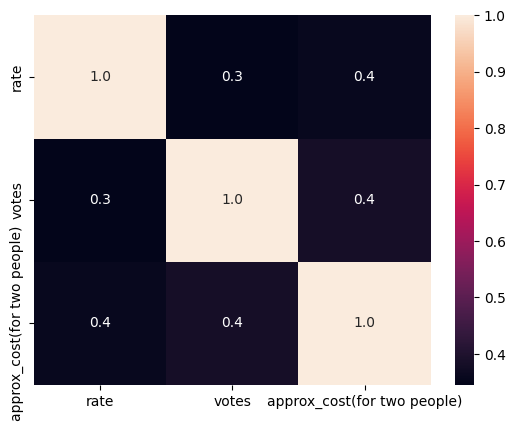

In [ ]:
sns.heatmap(df_eda[numerical].corr(),annot=True, fmt=".1f")

- There is positive relation between rate and (votes , approx_cost(for two people))

-----------------

<a id=section23></a>
### **Conclusion for Bivarate :**

**Some advice to be your successful  restaurant :**

1) online_order service is available

2)  must be have phone number

3) open your resturant in Mysore Road or Hebbal that have lower competition make good reputation after that open in Koramangala 5th Block or BTM that have higher competition.

4) you have to rest type will be Casual Dining or Quick Bites

5) you have to cuisines type will be North Indian or Chinese or South Indian

6) prefer put menu in website

7) you have to service provided will be Delivery or Dine-out


---------------------------

<a id=section9></a>

# **Multivarate**

## In this process i will ask some question and Visualization answer this question:
   * [ **Top 10 restuarant have good vote**(name,rate=1,vote)](#section25)<br>
   * [ **Lowest 10 restuarant have bad vote**(name,rate=0,vote)](#section26)<br>
   * [ **Relation between location and rest_type for rate** ](#section27)<br>
   * [ **Relation between location and cuisiness for rate** ](#section28)<br>
   * [ **Relation between location and approx_cost for rate** ](#section29)<br>
   * [ **Relation between location and listed_in(type) for rate**](#section30)<br>


<a id=section25></a>
### **Top 10 restuarant have good vote**(name,rate=1,vote)

In [ ]:
data=df_eda[df_eda.rate==1].groupby("name")["votes"].mean().reset_index().sort_values(by="votes",ascending=False).head(10)
data

,name,votes
386,Byg Brewski Brewing Company,16588.500000
2569,Toit,14956.000000
2357,The Black Pearl,9562.333333
283,Big Pitcher,9164.500000
131,Arbor Brewing Company,8396.545455
1825,Prost Brew Pub,7860.900000
576,Church Street Social,7561.727273
1022,Hoot,7257.000000
2419,The Hole in the Wall Cafe,7124.875000
2578,Truffles,7001.372093


In [ ]:
bar(data,"name",'votes',"Top 10 restuarant have good vote (name,rate=1,vote)")

----------------------------

<a id=section26></a>

### **Lowest 10 restuarant have bad vote**(name,rate=0,vote)

In [ ]:
data=df_eda[df_eda.rate==0].groupby("name")["votes"].mean().reset_index().sort_values(by="votes",ascending=False).head(10)
data

,name,votes
464,Barleyz,4651.750000
1628,Golkonda Chimney,1818.500000
4803,Xtreme Sports Bar,1114.500000
428,Banana Beach Bar,1014.687500
2757,Moriz Restaurant,959.375000
1201,Delhi Food Point,910.700000
83,Aalishan Restaurant & Caterer,888.454545
3138,Orzuv,837.000000
2527,M.M.A. Kabab's & Biriyani Center,795.500000
2518,Luo Han,777.000000


In [ ]:
bar(data,"name",'votes',"Lowest 10 restuarant have bad vote (name,rate=0,vote)")

-----------------------

<a id=section27></a>

### **Relation between location and rest_type for rate**

In [ ]:
df_eda.head(5)

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,1.0,775,have phone,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",not have menu,Buffet,Banashankari
1,Spice Elephant,Yes,No,1.0,787,have phone,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",not have menu,Buffet,Banashankari
2,San Churro Cafe,Yes,No,1.0,918,have phone,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",not have menu,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,0.0,88,have phone,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",not have menu,Buffet,Banashankari
4,Grand Village,No,No,1.0,166,have phone,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",not have menu,Buffet,Banashankari


In [ ]:
#pandas
data=df_eda.groupby(["rate","location","rest_type"]).agg({"rest_type":"count"}).rename(columns={"rest_type":"count"}).reset_index().sort_values(by="count",ascending=False).head(20)
data


,rate,location,rest_type,count
14,0.0,BTM,Quick Bites,1694
954,1.0,BTM,Quick Bites,477
1421,1.0,Koramangala 5th Block,Casual Dining,442
650,0.0,Marathahalli,Quick Bites,439
910,0.0,Whitefield,Quick Bites,430
75,0.0,Bannerghatta Road,Quick Bites,417
308,0.0,HSR,Quick Bites,409
410,0.0,Jayanagar,Quick Bites,403
7,0.0,BTM,Casual Dining,367
385,0.0,JP Nagar,Quick Bites,364


In [ ]:
data.rate=data.rate.astype("O")

In [ ]:
def sunburst(data,names,path,values,title_text):
    fig=px.sunburst(data_frame=data,names=names,path=path,values=values,
               width=900,height=900)
    fig.update_traces(textinfo="label+percent parent")
    fig.update_layout(title_text=title_text,title_x=0.5)
    return fig

In [ ]:
sunburst(data,"rate",["rate","location","rest_type"],"count","Relation between location and rest_type for rate")

__Note:__

- Most perfer rest_type for all loctaion is Quick Bites

--------------------------

<a id=section28></a>

### **Relation between location and cuisines for rate**

In [ ]:
#pandas
data=df_eda.groupby(["rate","location","cuisines"]).agg({"cuisines":"count"}).rename(columns={"cuisines":"count"}).reset_index().sort_values(by="count",ascending=False).head(30)
data


,rate,location,cuisines,count
164,0.0,BTM,"North Indian, Chinese",299
153,0.0,BTM,North Indian,202
4155,0.0,Whitefield,North Indian,113
528,0.0,Bannerghatta Road,"North Indian, Chinese",97
3109,0.0,Marathahalli,"North Indian, Chinese",95
93,0.0,BTM,Fast Food,91
770,0.0,Bellandur,North Indian,89
2036,0.0,JP Nagar,North Indian,84
3101,0.0,Marathahalli,North Indian,77
80,0.0,BTM,"Chinese, North Indian",76


In [ ]:
sunburst(data,"rate",["rate","location","cuisines"],"count","Relation between location and cuisines for rate")

__Note:__

- Most perfer cuisines for all loctaion is North Indian or Chinese or  South Indian

-------------------------

<a id=section29></a>

### **Relation between location and approx_cost for rate**

In [ ]:
data=df_eda.groupby(["rate","location"])["approx_cost(for two people)"].mean().reset_index().sort_values(by="approx_cost(for two people)",ascending=False).head(20)
data

,rate,location,approx_cost(for two people)
162,1.0,Sankey Road,2802.941176
74,0.0,Sankey Road,2166.666667
142,1.0,MG Road,1495.551601
141,1.0,Lavelle Road,1450.970874
153,1.0,Race Course Road,1415.322581
119,1.0,Infantry Road,1251.111111
65,0.0,Race Course Road,1232.666667
157,1.0,Residency Road,1160.732323
158,1.0,Richmond Road,1137.257618
150,1.0,Old Airport Road,1135.120482


In [ ]:
data.rate=data.rate.astype("O")

In [ ]:
bar(data,"location","approx_cost(for two people)",color="rate",title_text="Relation between location and approx_cost for rate")

__Note:__
- In Sankey Road has higher approx_cost(for two people) may be Sankey Road has expensive resturant

------------------

<a id=section30></a>

### **Relation between location and listed_in(type) for rate**

In [ ]:
#pandas
data=df_eda.groupby(["rate","location","listed_in(type)"]).agg({"listed_in(type)":"count"}).rename(columns={"listed_in(type)":"count"}).reset_index().sort_values(by="count",ascending=False).head(30)
data


,rate,location,listed_in(type),count
2,0.0,BTM,Delivery,1848
4,0.0,BTM,Dine-out,979
115,0.0,HSR,Delivery,777
414,1.0,BTM,Delivery,766
621,1.0,Koramangala 5th Block,Delivery,690
524,1.0,HSR,Delivery,639
623,1.0,Koramangala 5th Block,Dine-out,581
546,1.0,Indiranagar,Delivery,575
263,0.0,Marathahalli,Delivery,567
147,0.0,JP Nagar,Delivery,544


In [ ]:
sunburst(data,"rate",["rate","location","listed_in(type)"],"count","Relation between location and listed_in(type) for rate")

__Note:__

- Higher percentage for listed_in(type) to all rate in any location is __Delivery__

------------------------

# **Preprocessing**

### **in preprocessing i will do** :

1) drop name , reviews_list  and votes because its dont mean any thing in business case

2) [**Impute missing value**](#section31)<br>

3) [**DataFrame after preprocessing**](#section33)<br>

3) [**create Pipeline content all steps of preprocessing**](#section32)<br>

In [ ]:
df_pre=df_eda.copy()

In [ ]:
df_pre.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,1.0,775,have phone,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",not have menu,Buffet,Banashankari
1,Spice Elephant,Yes,No,1.0,787,have phone,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",not have menu,Buffet,Banashankari
2,San Churro Cafe,Yes,No,1.0,918,have phone,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",not have menu,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,0.0,88,have phone,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",not have menu,Buffet,Banashankari
4,Grand Village,No,No,1.0,166,have phone,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",not have menu,Buffet,Banashankari


In [ ]:
#1) drop name because its dont mean any thing in business case
df_pre.drop(["name","reviews_list","votes"],axis=1,inplace=True)

In [ ]:
df_pre.head()

,online_order,book_table,rate,phone,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,1.0,have phone,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,not have menu,Buffet,Banashankari
1,Yes,No,1.0,have phone,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,not have menu,Buffet,Banashankari
2,Yes,No,1.0,have phone,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,not have menu,Buffet,Banashankari
3,No,No,0.0,have phone,Banashankari,Quick Bites,"South Indian, North Indian",300.0,not have menu,Buffet,Banashankari
4,No,No,1.0,have phone,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,not have menu,Buffet,Banashankari


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [ ]:
col_onehot=['online_order', 'book_table', 'phone','menu_item'] #columns that apply one hot encoder
col_binary=['location','rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']#columns that apply binary encoder
col_robust=['approx_cost(for two people)']#columns that apply Robust scaler

<a id=section31></a>
### **Impute missing value**

In [ ]:
#first create piepline to convert all categorcail to numerical
ct=ColumnTransformer([
    ("oh",OneHotEncoder(),col_onehot),
    ("binary",BinaryEncoder(),col_binary)
])
pipline=Pipeline(steps=[
    ("ct",ct)
])

In [ ]:
encoder=pipline.fit_transform(df_pre)
encoder #array repsented to dataframe after make enconder and this array not include col_robust and rate

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [ ]:
robust_array=np.array(df_pre[col_robust])
robust_array

array([[ 800.],
       [ 800.],
       [ 800.],
       ...,
       [2000.],
       [2500.],
       [1500.]])

In [ ]:
robust_array.shape

(51088, 1)

In [ ]:
rate_array=np.array(df.rate).reshape(-1,1) #i will take rate of df before conert rate to 0,1
rate_array

array([[4.1],
       [4.1],
       [3.8],
       ...,
       [nan],
       [4.3],
       [3.4]])

In [ ]:
rate_array.shape

(51088, 1)

In [ ]:
num_array=np.concatenate((robust_array,rate_array),axis=1) #concatenate between another columns in data (votes','approx_cost(for two people) , rate)
num_array

array([[ 800. ,    4.1],
       [ 800. ,    4.1],
       [ 800. ,    3.8],
       ...,
       [2000. ,    nan],
       [2500. ,    4.3],
       [1500. ,    3.4]])

In [ ]:
data_array=np.concatenate((encoder,num_array),axis=1) #this array of data after make encoder enable to make impute missing value
data_array

array([[0.0e+00, 1.0e+00, 0.0e+00, ..., 1.0e+00, 8.0e+02, 4.1e+00],
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 1.0e+00, 8.0e+02, 4.1e+00],
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 1.0e+00, 8.0e+02, 3.8e+00],
       ...,
       [1.0e+00, 0.0e+00, 1.0e+00, ..., 0.0e+00, 2.0e+03,     nan],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 2.5e+03, 4.3e+00],
       [1.0e+00, 0.0e+00, 1.0e+00, ..., 0.0e+00, 1.5e+03, 3.4e+00]])

In [ ]:
#impute
imputer = KNNImputer(n_neighbors=5)
imputer_data=imputer.fit_transform(data_array)

In [ ]:
imputer_data #this array after impute missing value

array([[0.00e+00, 1.00e+00, 0.00e+00, ..., 1.00e+00, 8.00e+02, 4.10e+00],
       [0.00e+00, 1.00e+00, 1.00e+00, ..., 1.00e+00, 8.00e+02, 4.10e+00],
       [0.00e+00, 1.00e+00, 1.00e+00, ..., 1.00e+00, 8.00e+02, 3.80e+00],
       ...,
       [1.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 2.00e+03, 3.82e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 2.50e+03, 4.30e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 1.50e+03, 3.40e+00]])

In [ ]:
imputer_data[:,-1].reshape(-1,1) #this is column of rate after imputer missing value

array([[4.1 ],
       [4.1 ],
       [3.8 ],
       ...,
       [3.82],
       [4.3 ],
       [3.4 ]])

In [ ]:
df_pre["rate"]=imputer_data[:,-1].reshape(-1,1) #impute result in our data

In [ ]:
#check missing value
compare=pd.DataFrame({"rate with nan":df_eda["rate"],"rate without nan":df_pre["rate"]})
compare[compare["rate with nan"].isna()]

,rate with nan,rate without nan
84,NaN,0.00
90,NaN,2.98
91,NaN,4.00
92,NaN,3.46
107,NaN,3.54
...,...,...
51644,NaN,2.68
51675,NaN,4.16
51710,NaN,4.16
51713,NaN,3.82


In [ ]:
compare[compare["rate with nan"].isna()]["rate without nan"].unique()

array([0.  , 2.98, 4.  , 3.46, 3.54, 2.9 , 3.06, 2.86, 2.22, 2.96, 3.46,
       3.64, 1.36, 1.48, 2.78, 2.66, 1.52, 3.5 , 2.  , 2.8 , 3.7 , 3.52,
       3.76, 2.62, 3.32, 3.36, 3.8 , 3.62, 3.38, 2.82, 3.86, 2.92, 3.6 ,
       3.92, 3.9 , 3.28, 3.42, 2.7 , 3.4 , 2.72, 1.38, 2.88, 3.66, 1.94,
       2.08, 2.14, 3.62, 3.72, 3.82, 0.76, 3.22, 3.3 , 4.14, 3.02, 2.68,
       2.36, 3.48, 2.76, 1.34, 2.1 , 3.68, 3.44, 3.98, 3.64, 2.02, 3.48,
       2.56, 3.22, 3.56, 3.56, 2.06, 3.24, 3.24, 3.36, 3.58, 1.5 , 2.48,
       2.16, 2.66, 2.04, 2.76, 2.74, 2.54, 3.28, 3.2 , 3.84, 2.68, 2.64,
       3.54, 3.26, 3.06, 3.38, 2.12, 3.94, 3.1 , 3.08, 2.84, 3.34, 2.78,
       1.98, 3.84, 1.94, 4.22, 2.72, 3.74, 1.26, 3.68, 1.32, 2.82, 3.58,
       2.02, 4.3 , 3.16, 2.92, 3.16, 3.88, 3.96, 3.12, 4.08, 3.78, 3.66,
       3.1 , 3.42, 3.74, 3.34, 2.44, 2.86, 2.98, 2.18, 2.08, 3.18, 2.84,
       1.34, 1.96, 4.04, 2.26, 4.26, 3.02, 1.42, 2.52, 1.56, 3.4 , 3.96,
       4.02, 3.52, 2.64, 3.32, 2.92, 2.7 , 1.4 , 4.

In [ ]:
def success(x):
        if x >3.75:
            return 1
        elif x  <= 3.75:
            return 0
        else:
            return np.nan

df_pre.rate.apply(success)

0        1
1        1
2        1
3        0
4        1
        ..
51712    0
51713    1
51714    1
51715    1
51716    0
Name: rate, Length: 51088, dtype: int64

In [ ]:
df_pre.rate=df_pre.rate.apply(success)

In [ ]:
df_pre.rate.value_counts()

rate
0    30289
1    20799
Name: count, dtype: int64

In [ ]:
#final data after imputer
df_pre

,online_order,book_table,rate,phone,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,1,have phone,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,not have menu,Buffet,Banashankari
1,Yes,No,1,have phone,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,not have menu,Buffet,Banashankari
2,Yes,No,1,have phone,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,not have menu,Buffet,Banashankari
3,No,No,0,have phone,Banashankari,Quick Bites,"South Indian, North Indian",300.0,not have menu,Buffet,Banashankari
4,No,No,1,have phone,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,not have menu,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,0,have phone,Whitefield,Bar,Continental,1500.0,not have menu,Pubs and bars,Whitefield
51713,No,No,1,have phone,Whitefield,Bar,Finger Food,600.0,not have menu,Pubs and bars,Whitefield
51714,No,No,1,not have phone,Whitefield,Bar,Finger Food,2000.0,not have menu,Pubs and bars,Whitefield
51715,No,Yes,1,have phone,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,not have menu,Pubs and bars,Whitefield


In [ ]:
#check nan
df_pre.isna().sum()

online_order                   0
book_table                     0
rate                           0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
#save data
df_pre.to_csv("sample.csv",index=False)

------------------------

<a id=section33></a>

### **DataFrame after preprocessing**

In [ ]:
X=df_pre.drop("rate",axis=1)
y=df_pre.rate

In [ ]:
encoder=OneHotEncoder()
ct1=ColumnTransformer([("encoder",encoder,col_onehot)])

In [ ]:
X_df=ct1.fit_transform(X)


In [ ]:
X_df

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [ ]:
X_df.shape

(51088, 8)

In [ ]:
df_one=pd.DataFrame(X_df,columns=ct1.get_feature_names_out()).reset_index() #dataframe content only columns apply one hot encoder
df_one

,index,encoder__online_order_No,encoder__online_order_Yes,encoder__book_table_No,encoder__book_table_Yes,encoder__phone_have phone,encoder__phone_not have phone,encoder__menu_item_have menu,encoder__menu_item_not have menu
0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
51083,51083,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
51084,51084,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
51085,51085,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
51086,51086,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
encoder = BinaryEncoder(cols=col_binary)
df_encoded = encoder.fit_transform(X)

# Get the column names after binary encoding
encoded_column_names = df_encoded.columns.tolist()

In [ ]:
df_encoded=df_encoded.reset_index()

In [ ]:
df_encoded #this dataframe contant all columns (onehot encoder before apply and numercial column and binary encoder columns after apply binary encoder)

,index,online_order,book_table,phone,location_0,location_1,location_2,location_3,location_4,location_5,...,approx_cost(for two people),menu_item,listed_in(type)_0,listed_in(type)_1,listed_in(type)_2,listed_in(city)_0,listed_in(city)_1,listed_in(city)_2,listed_in(city)_3,listed_in(city)_4
0,0,Yes,Yes,have phone,0,0,0,0,0,0,...,800.0,not have menu,0,0,1,0,0,0,0,1
1,1,Yes,No,have phone,0,0,0,0,0,0,...,800.0,not have menu,0,0,1,0,0,0,0,1
2,2,Yes,No,have phone,0,0,0,0,0,0,...,800.0,not have menu,0,0,1,0,0,0,0,1
3,3,No,No,have phone,0,0,0,0,0,0,...,300.0,not have menu,0,0,1,0,0,0,0,1
4,4,No,No,have phone,0,0,0,0,0,1,...,600.0,not have menu,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51083,51712,No,No,have phone,0,0,1,1,1,1,...,1500.0,not have menu,1,1,1,1,1,1,1,0
51084,51713,No,No,have phone,0,0,1,1,1,1,...,600.0,not have menu,1,1,1,1,1,1,1,0
51085,51714,No,No,not have phone,0,0,1,1,1,1,...,2000.0,not have menu,1,1,1,1,1,1,1,0
51086,51715,No,Yes,have phone,1,0,0,0,0,0,...,2500.0,not have menu,1,1,1,1,1,1,1,0


In [ ]:
df_encoded.drop(col_onehot,axis=1,inplace=True)# iwill drop onehot columns

In [ ]:
df_encoded

,index,location_0,location_1,location_2,location_3,location_4,location_5,location_6,rest_type_0,rest_type_1,...,cuisines_11,approx_cost(for two people),listed_in(type)_0,listed_in(type)_1,listed_in(type)_2,listed_in(city)_0,listed_in(city)_1,listed_in(city)_2,listed_in(city)_3,listed_in(city)_4
0,0,0,0,0,0,0,0,1,0,0,...,1,800.0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,800.0,0,0,1,0,0,0,0,1
2,2,0,0,0,0,0,0,1,0,0,...,1,800.0,0,0,1,0,0,0,0,1
3,3,0,0,0,0,0,0,1,0,0,...,0,300.0,0,0,1,0,0,0,0,1
4,4,0,0,0,0,0,1,0,0,0,...,1,600.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51083,51712,0,0,1,1,1,1,1,0,0,...,1,1500.0,1,1,1,1,1,1,1,0
51084,51713,0,0,1,1,1,1,1,0,0,...,0,600.0,1,1,1,1,1,1,1,0
51085,51714,0,0,1,1,1,1,1,0,0,...,0,2000.0,1,1,1,1,1,1,1,0
51086,51715,1,0,0,0,0,0,1,0,0,...,0,2500.0,1,1,1,1,1,1,1,0


In [ ]:
df_encoded.columns

Index(['index', 'location_0', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'rest_type_0', 'rest_type_1',
       'rest_type_2', 'rest_type_3', 'rest_type_4', 'rest_type_5',
       'rest_type_6', 'cuisines_0', 'cuisines_1', 'cuisines_2', 'cuisines_3',
       'cuisines_4', 'cuisines_5', 'cuisines_6', 'cuisines_7', 'cuisines_8',
       'cuisines_9', 'cuisines_10', 'cuisines_11',
       'approx_cost(for two people)', 'listed_in(type)_0', 'listed_in(type)_1',
       'listed_in(type)_2', 'listed_in(city)_0', 'listed_in(city)_1',
       'listed_in(city)_2', 'listed_in(city)_3', 'listed_in(city)_4'],
      dtype='object')

In [ ]:
p=df_encoded['approx_cost(for two people)']
p

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51083    1500.0
51084     600.0
51085    2000.0
51086    2500.0
51087    1500.0
Name: approx_cost(for two people), Length: 51088, dtype: float64

In [ ]:
df_encoded.drop("approx_cost(for two people)",axis=True,inplace=True)
#add agin in last position
df_encoded['approx_cost(for two people)']=p

In [ ]:
df_encoded #this dataframe don't have result of one hot encoder so i will merge one hot encoder

,index,location_0,location_1,location_2,location_3,location_4,location_5,location_6,rest_type_0,rest_type_1,...,cuisines_11,listed_in(type)_0,listed_in(type)_1,listed_in(type)_2,listed_in(city)_0,listed_in(city)_1,listed_in(city)_2,listed_in(city)_3,listed_in(city)_4,approx_cost(for two people)
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,800.0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,800.0
2,2,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,800.0
3,3,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,300.0
4,4,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51083,51712,0,0,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,1500.0
51084,51713,0,0,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,0,600.0
51085,51714,0,0,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,0,2000.0
51086,51715,1,0,0,0,0,0,1,0,0,...,0,1,1,1,1,1,1,1,0,2500.0


In [ ]:
#merge
df_preprocces=df_one.merge(df_encoded,on="index",how="inner").drop("index",axis=1)
df_preprocces #final dataframe after make encoder

,encoder__online_order_No,encoder__online_order_Yes,encoder__book_table_No,encoder__book_table_Yes,encoder__phone_have phone,encoder__phone_not have phone,encoder__menu_item_have menu,encoder__menu_item_not have menu,location_0,location_1,...,cuisines_11,listed_in(type)_0,listed_in(type)_1,listed_in(type)_2,listed_in(city)_0,listed_in(city)_1,listed_in(city)_2,listed_in(city)_3,listed_in(city)_4,approx_cost(for two people)
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,...,1,0,0,1,0,0,0,0,1,800.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,1,800.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,...,1,0,0,1,0,0,0,0,1,800.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,1,300.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,...,1,0,0,1,0,0,0,0,1,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50462,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,...,1,1,0,1,1,1,1,1,0,1200.0
50463,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,...,0,1,0,1,1,1,1,1,0,900.0
50464,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,...,0,1,0,1,1,1,1,1,0,1400.0
50465,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,...,1,1,0,1,1,1,1,1,0,700.0


-------------------

<a id=section32></a>
### **Pipeline**

In [ ]:
models=[]
models.append(("LR",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("XGB",XGBClassifier()))


In [ ]:
col_onehot=['online_order', 'book_table', 'phone','menu_item'] #columns that apply one hot encoder
col_binary=['location','rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']#columns that apply binary encoder
col_robust=['approx_cost(for two people)']#columns that apply Robust scaler

In [ ]:

for model in models:
    steps_ct=[]#list content steps that process in only ColumnTransformer
    steps=[] #list content steps that process in pipeline
    steps_ct.append(("ohe",OneHotEncoder(),col_onehot))
    steps_ct.append(("binary",BinaryEncoder(),col_binary))
    steps_ct.append(("robust",RobustScaler(),col_robust))
    steps.append(("ct",ColumnTransformer(steps_ct)))
    steps.append(model)#final append models
    pipline=Pipeline(steps=steps)
    score=cross_validate(pipline,X,y,cv=5,scoring="f1",return_train_score=True)
    print(model[0])
    print("Training accuracy =",score["train_score"].mean())
    print("testing accuracy =",score["test_score"].mean())
    print("*"*50)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR
Training accuracy = 0.6146708509298113
testing accuracy = 0.5779706874808719
**************************************************
SVC
Training accuracy = 0.7492184318313995
testing accuracy = 0.6763450183928476
**************************************************
KNN
Training accuracy = 0.8937118254613663
testing accuracy = 0.8020532653550901
**************************************************
DTC
Training accuracy = 0.9900754866669679
testing accuracy = 0.81930624629411
**************************************************
RF
Training accuracy = 0.9901222519176285
testing accuracy = 0.8380811120413834
**************************************************
GB
Training accuracy = 0.6488610622580216
testing accuracy = 0.6105385447220639
**************************************************
XGB
Training accuracy = 0.8387613975140626
testing accuracy = 0.7399854962864651
**************************************************


best model is Random Forest

--------------------------

# **Model Tuning**

In [ ]:
# initial model
XGB=XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)

steps_ct=[]#list content steps that process in only ColumnTransformer
steps=[] #list content steps that process in pipeline
steps_ct.append(("ohe",OneHotEncoder(),col_onehot))
steps_ct.append(("binary",BinaryEncoder(),col_binary))
steps_ct.append(("robust",RobustScaler(),col_robust))
steps.append(("ct",ColumnTransformer(steps_ct)))
steps.append(("XGB",XGB))#final append models
pipline=Pipeline(steps=steps)

In [ ]:
pipline

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['online_order', 'book_table',
                                                   'phone', 'menu_item']),
                                                 ('binary', BinaryEncoder(),
                                                  ['location', 'rest_type',
                                                   'cuisines',
                                                   'listed_in(type)',
                                                   'listed_in(city)']),
                                                 ('robust', RobustScaler(),
                                                  ['approx_cost(for two '
                                                   'people)'])])),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=No...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, nthread=4, num_parallel_tree=None, ...))])

In [ ]:
score=cross_validate(pipline,X,y,cv=5,scoring="f1",return_train_score=True)
print("Training accuracy of Inital XGB =",score["train_score"].mean())
print("Testing accuracy of Inital XGB=",score["test_score"].mean())

Training accuracy of Inital XGB = 0.8849122458358101
Testing accuracy of Inital XGB= 0.7702350583411369


**Step 2: Tune max_depth and min_child_weight.**

In [ ]:
param_test1 = {'XGB__max_depth':range(3,10,2),'XGB__min_child_weight':range(1,6,2)}
gsearch1=GridSearchCV(estimator = pipline, param_grid = param_test1, scoring='f1',cv=5)

In [ ]:
gsearch1.fit(X,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['online_order',
                                                                          'book_table',
                                                                          'phone',
                                                                          'menu_item']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['location',
                                                                          'rest_type',
                                                                          'cuisines',
                                                                          'listed_in(type)',
                                                                          'listed_in(city)']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['approx_cost(for '
                                                                          'two '
                                                                          'people)'])])),
                                       ('XGB',
                                        XGBClassifier(base_score=...
                                                      learning_rate=0.1,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=5,
                                                      max_leaves=None,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=1000,
                                                      n_jobs=None, nthread=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'XGB__max_depth': range(3, 10, 2),
                         'XGB__min_child_weight': range(1, 6, 2)},
             scoring='f1')

In [ ]:
#best parameter
print("Best parameter in XGB 1",gsearch1.best_params_)


Best parameter in XGB 1 {'XGB__max_depth': 9, 'XGB__min_child_weight': 1}


In [ ]:
score1=cross_validate(gsearch1.best_estimator_,X,y,cv=5,scoring="f1",return_train_score=True)
print("Training accuracy of XGB 1 =",score1["train_score"].mean())
print("Testing accuracy of XGB 1 =",score1["test_score"].mean())

Training accuracy of XGB 1 = 0.9900157829989146
Testing accuracy of XGB 1 = 0.849148056097867


**Step 3: Tune gamma.**

In [ ]:
param_test2 = {'XGB__gamma':[i/10.0 for i in range(0,5)]}
gsearch2=GridSearchCV(estimator = gsearch1.best_estimator_, param_grid = param_test2, scoring='f1',cv=5)

In [ ]:
gsearch2.fit(X,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['online_order',
                                                                          'book_table',
                                                                          'phone',
                                                                          'menu_item']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['location',
                                                                          'rest_type',
                                                                          'cuisines',
                                                                          'listed_in(type)',
                                                                          'listed_in(city)']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['approx_cost(for '
                                                                          'two '
                                                                          'people)'])])),
                                       ('XGB',
                                        XGBClassifier(base_score=...
                                                      interaction_constraints=None,
                                                      learning_rate=0.1,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=9,
                                                      max_leaves=None,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=1000,
                                                      n_jobs=None, nthread=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'XGB__gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='f1')

In [ ]:
#best parameter
print("Best parameter in XGB 2",gsearch2.best_params_)

Best parameter in XGB 2 {'XGB__gamma': 0.0}


In [ ]:
score2=cross_validate(gsearch2.best_estimator_,X,y,cv=5,scoring="f1",return_train_score=True)
print("Training accuracy of XGB 2 =",score2["train_score"].mean())
print("Testing accuracy of XGB 2 =",score2["test_score"].mean())

Training accuracy of XGB 2 = 0.9900157829989146
Testing accuracy of XGB 2 = 0.849148056097867


**Step 4: Tune subsample and colsample_bytree**

In [ ]:
param_test3 = {
 'XGB__subsample':[i/10.0 for i in range(6,10)],
 'XGB__colsample_bytree':[i/10.0 for i in range(6,10)]}
gsearch3=GridSearchCV(estimator = gsearch2.best_estimator_, param_grid = param_test3, scoring='f1',cv=5)

In [ ]:
gsearch3.fit(X,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['online_order',
                                                                          'book_table',
                                                                          'phone',
                                                                          'menu_item']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['location',
                                                                          'rest_type',
                                                                          'cuisines',
                                                                          'listed_in(type)',
                                                                          'listed_in(city)']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['approx_cost(for '
                                                                          'two '
                                                                          'people)'])])),
                                       ('XGB',
                                        XGBClassifier(base_score=...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=9,
                                                      max_leaves=None,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=1000,
                                                      n_jobs=None, nthread=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'XGB__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'XGB__subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='f1')

In [ ]:
#best parameter
print("Best parameter in XGB 3",gsearch3.best_params_)

Best parameter in XGB 3 {'XGB__colsample_bytree': 0.9, 'XGB__subsample': 0.9}


In [ ]:
score3=cross_validate(gsearch3.best_estimator_,X,y,cv=5,scoring="f1",return_train_score=True)
print("Training accuracy of XGB 3 =",score3["train_score"].mean())
print("Testing accuracy of XGB 3 =",score3["test_score"].mean())

Training accuracy of XGB 3 = 0.9900523833434185
Testing accuracy of XGB 3 = 0.8536208359965105


**Step 5: Tuning regularization parameters**

In [ ]:
param_test4 = {'XGB__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

gsearch4=GridSearchCV(estimator = gsearch3.best_estimator_, param_grid = param_test4, scoring='f1',cv=5)

In [ ]:
gsearch4.fit(X,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['online_order',
                                                                          'book_table',
                                                                          'phone',
                                                                          'menu_item']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['location',
                                                                          'rest_type',
                                                                          'cuisines',
                                                                          'listed_in(type)',
                                                                          'listed_in(city)']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['approx_cost(for '
                                                                          'two '
                                                                          'people)'])])),
                                       ('XGB',
                                        XGBClassifier(base_score=...
                                                      interaction_constraints=None,
                                                      learning_rate=0.1,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=9,
                                                      max_leaves=None,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=1000,
                                                      n_jobs=None, nthread=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'XGB__reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='f1')

In [ ]:
#best parameter
print("Best parameter in XGB 4",gsearch4.best_params_)


Best parameter in XGB 4 {'XGB__reg_alpha': 0.1}


In [ ]:
score4=cross_validate(gsearch4.best_estimator_,X,y,cv=5,scoring="f1",return_train_score=True)
print("Training accuracy of XGB 4 =",score4["train_score"].mean())
print("Testing accuracy of XGB 4 =",score4["test_score"].mean())

Training accuracy of XGB 4 = 0.9900446738405211
Testing accuracy of XGB 4 = 0.8550520500754333


## **Features importance**

In [ ]:
gsearch4.best_estimator_.steps[1]


('XGB',
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.9, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.0, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=9, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
               num_parallel_tree=None, ...))

In [ ]:
gsearch4.best_estimator_.steps[1][1].feature_importances_


array([0.01612954, 0.01545956, 0.4738267 , 0.13559932, 0.01120178,
       0.01050962, 0.00414811, 0.00504766, 0.01008303, 0.01126624,
       0.00970723, 0.00942084, 0.0092627 , 0.00893976, 0.00831349,
       0.00944343, 0.01856108, 0.01415569, 0.0102718 , 0.01427508,
       0.01044921, 0.01079125, 0.01199666, 0.01394541, 0.01146486,
       0.01015314, 0.00985266, 0.00867313, 0.0088745 , 0.00847328,
       0.00920875, 0.00894928, 0.00889232, 0.00912378, 0.00324162,
       0.0033684 , 0.01584267, 0.00440645, 0.00451782, 0.00367548,
       0.00371658, 0.00325272, 0.01150736], dtype=float32)

In [ ]:
feature_important=gsearch4.best_estimator_.steps[1][1].feature_importances_

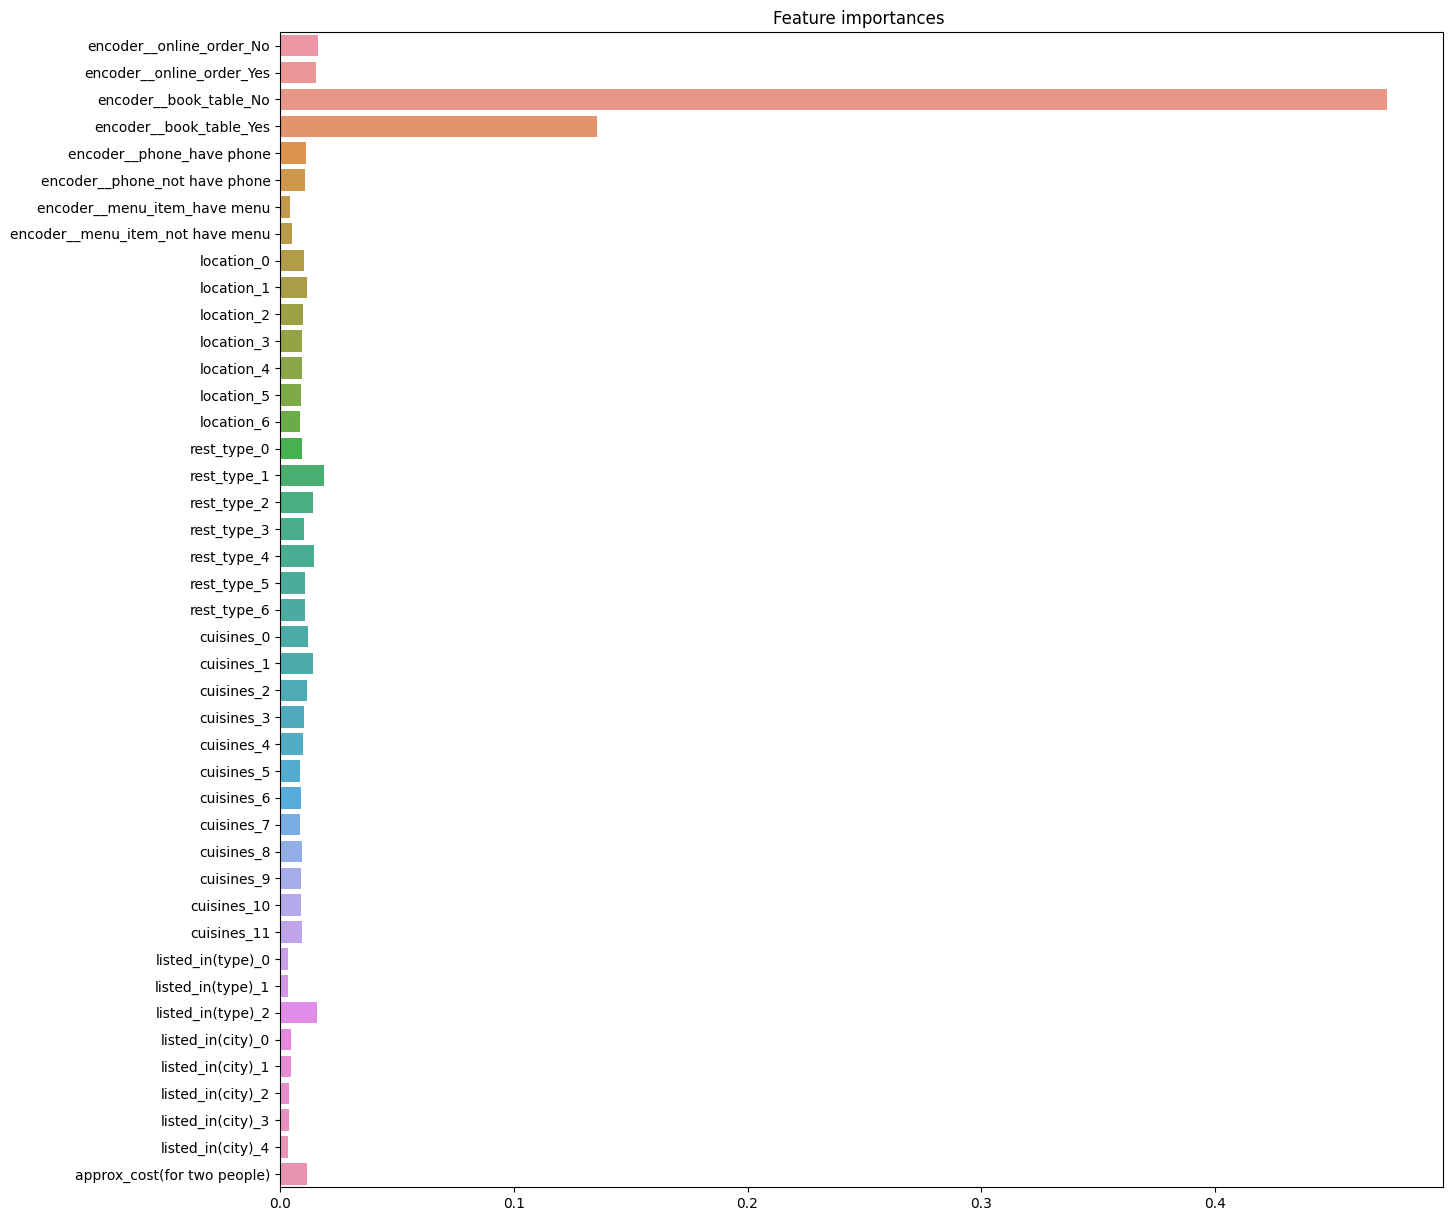

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x=feature_important,y=df_preprocces.columns)
plt.title("Feature importances ")
plt.show()

- __Note :__

__Book Table__ is the most important feature in data

### **The final accuracy before and after tuning :**


In [ ]:
print("Training accuracy of before tuning =",score["train_score"].mean().round(4))
print("Testing accuracy of before tuning =",score["test_score"].mean().round(4))
print("*"*50)
print("Training accuracy of after tuning  =",score3["train_score"].mean().round(4))
print("Testing accuracy of after tuning =",score3["test_score"].mean().round(4))

Training accuracy of before tuning = 0.8849
Testing accuracy of before tuning = 0.7702
**************************************************
Training accuracy of after tuning  = 0.9901
Testing accuracy of after tuning = 0.8536


In [ ]:
model=gsearch4.best_estimator_
model

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['online_order', 'book_table',
                                                   'phone', 'menu_item']),
                                                 ('binary', BinaryEncoder(),
                                                  ['location', 'rest_type',
                                                   'cuisines',
                                                   'listed_in(type)',
                                                   'listed_in(city)']),
                                                 ('robust', RobustScaler(),
                                                  ['approx_cost(for two '
                                                   'people)'])])),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=No...
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, nthread=4, num_parallel_tree=None, ...))])

In [ ]:
model.fit(X,y)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['online_order', 'book_table',
                                                   'phone', 'menu_item']),
                                                 ('binary', BinaryEncoder(),
                                                  ['location', 'rest_type',
                                                   'cuisines',
                                                   'listed_in(type)',
                                                   'listed_in(city)']),
                                                 ('robust', RobustScaler(),
                                                  ['approx_cost(for two '
                                                   'people)'])])),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=No...
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, nthread=4, num_parallel_tree=None, ...))])

# **Save and load Model**

In [ ]:
import joblib
joblib.dump(model,"model.pkl")#save model
joblib.dump(X.columns,"input.pkl")#save input columns

model=joblib.load("model.pkl") #load model

# **Testing model**

In [ ]:
# in this sample data rate was been = 1
data={'online_order': 'Yes',
 'book_table': 'No',
 'phone':'have phone',
 'location':'MG Road',
 'rest_type':'Cafe, Bakery',
 'cuisines':'Cafe, Bakery',
 'approx_cost(for two people)':500.0,
 'menu_item':'have menu',
 'listed_in(type)':'Desserts',
 'listed_in(city)':'Church Street'}
df_test=pd.DataFrame(data,index=[0])
df_test

,online_order,book_table,phone,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Yes,No,have phone,MG Road,"Cafe, Bakery","Cafe, Bakery",500.0,have menu,Desserts,Church Street


In [ ]:
model.predict(df_test)

array([1])

In [ ]:
#function predict
def prediction(df):
    value_predict=model.predict(df)[0]
    if value_predict ==1:
        return "This restaurant will be successful"
    else:
        return "This restaurant will be not successful"

In [ ]:
prediction(df_test)

'This restaurant will be successful'